# Машинное обучение, DS-поток
## Задание ML.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 120 баллов;
* Задача 3 &mdash; 20 баллов + бонусы до 30 баллов.

In [1]:
# Bot check

# HW_ID: ds_ml6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer, mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, ShuffleSplit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm
import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
with open("token.txt", "r") as f:
    px.set_mapbox_access_token(f.read())

---
### Задача 1

В модели XGBoost запишите задачу оптимизации при построении нового дерева, критерий информативности и оптимальные ответы в листьях в следующих случаях.
1. Задача регрессии, квадратичная функция потерь $L(y, z) = (y - z)^2$.
2. Задача классификации, экспоненциальная функция потерь $L(y, z) = e^{-yz}$.
3. Задача классификации, логистическая функция потерь $L(y, z) = \ln(1 + e^{-yz})$.

В задачах классификации классификатор предсказывает степень уверенности принадлежности классу из $\mathscr{Y} \in \{-1, +1\}$. Решающее правило имеет вид $f(x) = \mathrm{sign} \widehat{y}(x)$.

---
### Задача 2

В файле `houses_train.csv` представлен набор данных про квартиры в городе Сиэтл, штат Вашингтон. Задача — предсказать цену на жилье по имеющимся данным.

Данные имеют следующие столбцы:
* `id` — идентификационный номер жилья
* `date` — дата продажи дома
* `price` — цена
* `bedrooms` — количество спален
* `bathrooms` — количество ванных комнат, где .5 означает комнату с туалетом, но без душа
* `sqft_living` — площадь жилья
* `sqft_lot` — площадь участка
* `floors` — количество этажей
* `waterfront` — видна ли набережная
* `view` — насколько хороший вид
* `condition` — индекс от 1 от 5, отвечающий за состояние квартиры
* `grade` — 1 до 13, 1-3 соответствует плохому уровню строительства и дизайна, 3-7 — средний уровень, 11-13 — высокий.
* `sqft_above` — жилая площадь над уровнем земли
* `sqft_basement` — жилая площадь под уровнем земли
* `yr_built` — год постройки жилья
* `yr_renovated` — год последней реконструкции жилья
* `zipcode` — почтовый индекс
* `lat` — широта
* `long` — долгота
* `sqft_living15` — средняя площадь жилья ближайших 15-и соседей
* `sqft_lot15` — средняя площадь участка ближайших 15-и соседей

В следующей задаче вы будете работать с ними в рамках Kaggle-соревнования. Предлагаем сначала подготовиться к нему, исследовав работу различных бустинг-библиотек применительно к этим данных. Результаты этой задаче вы сможете использовать в качестве начального решения соревнования.

**1.** Исследуйте зависимость качества по метрике MAPE для моделей 
* XGBoost, 
* LightGBM, 
* CatBoost, 
* а так же градиентного бустинга из sklearn, 

в зависимости от
* количества деревьев, 
* их максимальной глубины, 
* шага обучения, 
* $\ell_1$ и $\ell_2$ регуляризаций. 

При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий, масштаб осей так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментариии и выводы.

*Советы.*
* Используйте код с семинаров.
* Пока мы не умеем работать с признаком `zipcode`, удалите его из данных.

*Замечания.*
* Не забывайте, что для некоторых параметров стоит генерировать сетку значений при помощи `np.logspace`.

In [3]:
target, features = 'price', ['date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
    'grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']  # без zipcode и id
df = pd.read_csv('houses_train.csv', usecols=[target,*features])

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'], df['month'], df['day'], df['day_of_week'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.day, df['date'].dt.day_of_week
df.drop(['date'], inplace=True, axis=1)  # тип столбца object не поддерживается некоторыми методами, надо немного предобработать
features.extend(['year','month','day','day_of_week'])
features.remove('date')

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,2015,10,13,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,2015,12,9,2
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,2015,12,9,2


gb: 100%|██████████| 20/20 [08:11<00:00, 24.58s/it]


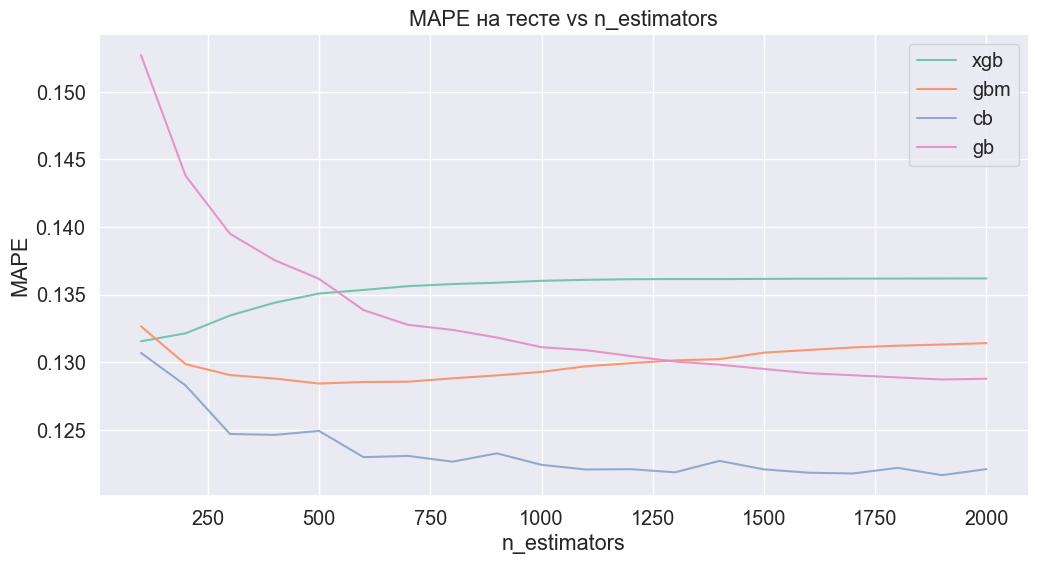

gb: 100%|██████████| 14/14 [01:28<00:00,  6.32s/it]


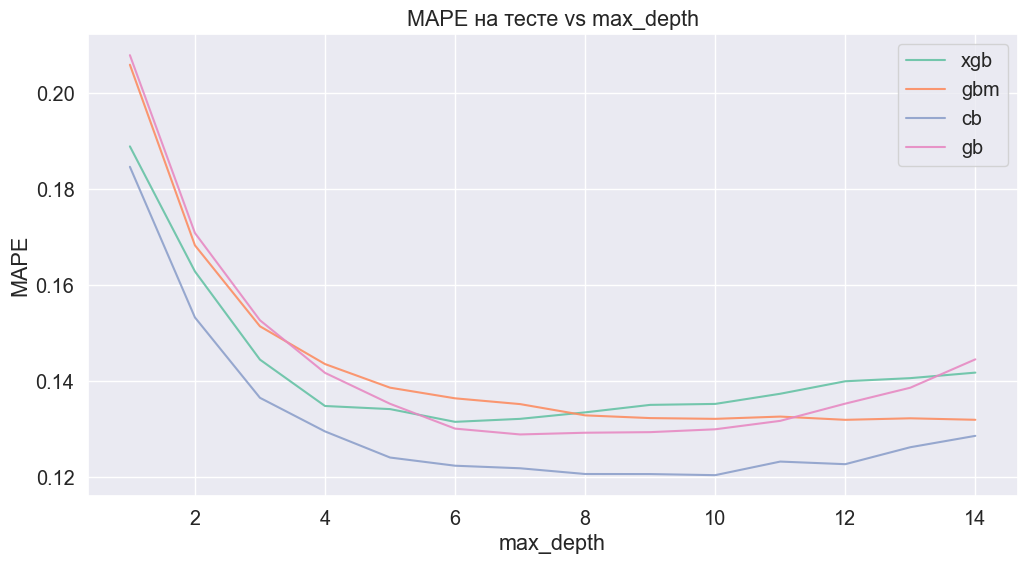

gb: 100%|██████████| 15/15 [00:36<00:00,  2.42s/it]


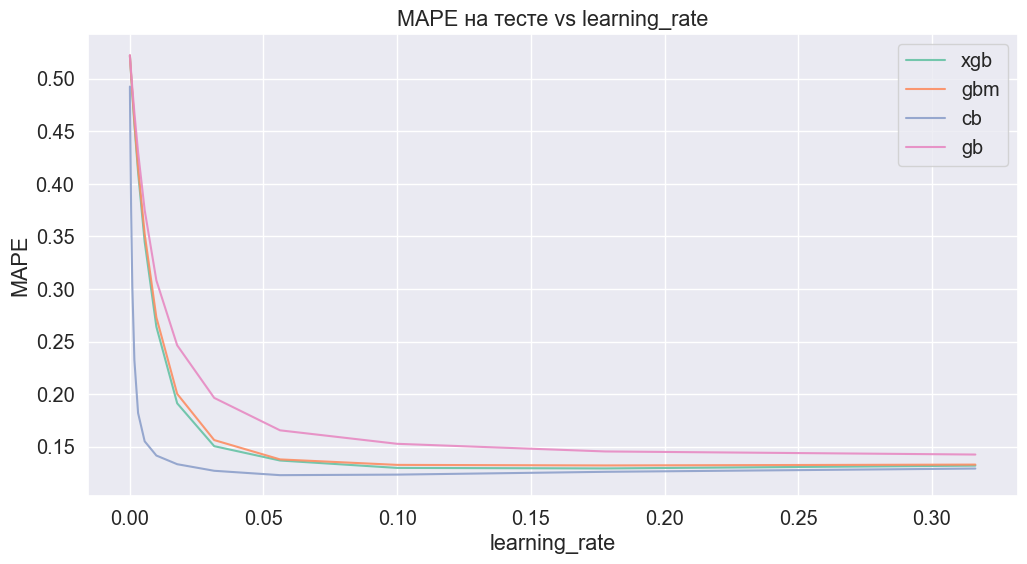

gb: 100%|██████████| 10/10 [00:00<?, ?it/s]


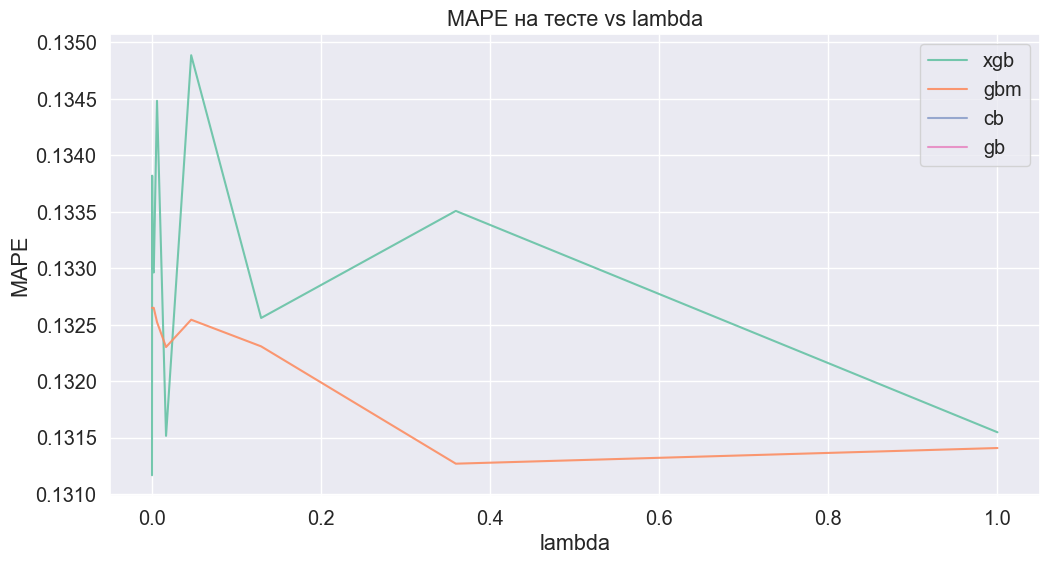

gb: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


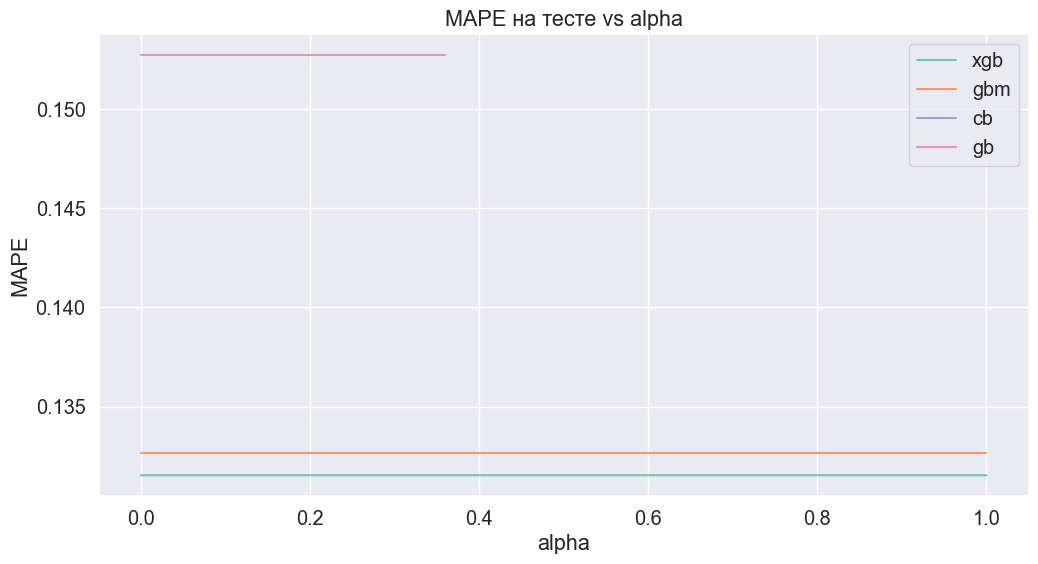

In [4]:
models = {'xgb':XGBRegressor, 'gbm':LGBMRegressor, 'cb':CatBoostRegressor, 'gb':GradientBoostingRegressor}
grids = {'n_estimators':np.arange(100,2001,100), 'max_depth':np.arange(1,15), 'learning_rate':np.logspace(-4,-0.5,15), 
         'lambda':np.logspace(-4,0,10), 'alpha':np.logspace(-4,0,10)}
for param_name, grid in grids.items():
    plt.figure(figsize=(12,6))
    for model_name, Model in models.items():
        err = []
        for param in tqdm(grid, desc=model_name):
            try:  # если такого параметра нет
                model = Model(random_state=42, verbose=-int(model_name=='gbm'), **{param_name:param}).fit(X_train, y_train)
            except:
                err.append(np.nan)
            else:
                err.append(MAPE(y_test, model.predict(X_test)))
        plt.plot(grid, err, label=model_name, alpha=0.9)
    plt.title(f'MAPE на тесте vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('MAPE')
    plt.legend()
    plt.show()

**2.** Нарисуйте по несколько деревьев каждой из моделей с помощью функций `plot_tree`, которая реализована в каждой из библиотек. Для этого потребуется немного разобраться с тем, как работают эти функции. 

Какие особенности можно заметить? Как меняются деревья при изменении максимальной глубины? Что выдает CatBoost в листе, если в него не попали объекты обучающей выборки?

In [5]:
# models = {'xgb':XGBRegressor}  #, 'gbm':LGBMRegressor, 'cb':CatBoostRegressor, 'gb':GradientBoostingRegressor}
# for model_name, Model in models.items():
#     # plt.figure(figsize=(12,6))
#     model = Model(random_state=42, verbose=-1).fit(X_train, y_train)  # с дефолтными значениями
#     xgb.plot_tree(model)
#     fig, ax = plt.subplots(figsize=(30, 30))
#     xgb.plot_tree(model, num_trees=4, ax=ax)
#     plt.title(f'Визуализация деревьев ({model_name})')
#     # plt.xlabel(param_name)
#     # plt.ylabel('MAPE')
#     # plt.legend()
#     plt.show()

**3.** Исследуйте среднее время обучения и предсказания для разных моделей. Для более честного сравнения для каждой модели стоит использовать те значения гиперпараметров, которые для нее оптимальны.

In [8]:
models = {'xgb':XGBRegressor, 'gbm':LGBMRegressor, 'cb':CatBoostRegressor, 'gb':GradientBoostingRegressor}
opt_params = {
    'xgb':{'n_estimators':200, 'max_depth':6, 'learning_rate':0.1},
    'gbm':{'n_estimators':500, 'max_depth':14,'learning_rate':0.1}, 
    'cb': {'n_estimators':2000,'max_depth':8, 'learning_rate':0.1}, 
    'gb': {'n_estimators':2000,'max_depth':7, 'learning_rate':0.1}}
for model_name, Model in models.items():
    print(f'{model_name}:')
    model = Model(random_state=42, verbose=-(model_name=='gbm'), **opt_params[model_name])
    start = datetime.datetime.now()
    for _ in range(10):
        model.fit(X_train, y_train)
    stop = datetime.datetime.now()
    print(f'    t обучения: {(stop-start).seconds/10:.2f} сек')
    start = datetime.datetime.now()
    for _ in range(10):
        model.predict(X_test)
    stop = datetime.datetime.now()
    print(f'    t предсказания: {(stop-start).seconds/10:.2f} сек')

xgb:
    t обучения: 0.30 сек
    t предсказания: 0.00 сек
gbm:
    t обучения: 0.50 сек
    t предсказания: 0.00 сек
cb:
    t обучения: 12.90 сек
    t предсказания: 0.00 сек
gb:
    t обучения: 108.80 сек
    t предсказания: 0.10 сек


***Выводы:** в этой задаче было рассмотрено несколько сильных подходов к задаче регрессии, основанных на деревьях. Был изучен ряд зависимостей качества работы моделей от нескольких параметров. В рамках текущего kaggle соревнования нет ограничения на время работы, поэтому различия по скорости методов можем проигнорировать (хотя они, безусловно, существуют)*

---
### Задача 3

В продолжении исследований из предыдущей задачи выберите некоторое количество хороших на ваш взгляд моделей, постройте для них предсказание на тестовой выборке. Полученные предсказания отправьте в тренировочное соревнование на Kaggle.

Ссылка: https://www.kaggle.com/competitions/ds-2024-autumn-36

Инвайт: https://www.kaggle.com/t/a58c055b57ac4a04b857ad11fe607333

**Правила**

* В Kaggle в данное тренировочное соревнование можно отправлять не более 7 решений в день (8-ю система не позволит).
* Решения индивидуальные.
* Качество считается по метрике MAPE.
* До окончания соревнования доступны значения качества, посчитанные только на случайных 30% тестовых данных. Значения отображаются в Public Leaderboard
* После окончания соревнования становится доступным Private Leaderboard, в котором значения качества посчитаны на оставшихся 70% объектов.
* Для включения в Private Leaderboard можно выбрать две посылки.
* В Leaderboard должны отображаться ваши **реальные имя и фамилия**. В противном случае решение может быть не зачтено.
* Все файлы, которые вы отправляете в соревнование, видны организаторам соревнования. Файлы должны иметь понятное имя, при отправке файла в систему необходимо написать краткое описание решения. **Это будет проверяться.**
* В решении, отправляемом боту, должно быть отображено, результаты каких моделей вы отправляете в соревнование.
* Не забывайте сделать пояснения к своему решению. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* Пользоваться можно любыми пройденными в наших курсах моделями.
* Нельзя пользоваться любыми методами и моделями, которые мы не проходили, и которых не было ранее в иных курсах, которые обязательны для всех.
* Код студентов, занявших первые 3 места, будет запускаться. Также выборочно может запускаться код и остальных студентов.

**Сроки сдачи**
 
* **Дедлайн в Kaggle** совпадает с дедлайном по заданию. Дедлайн строгий, Kaggle не позволит сдать даже на секунду позже.
* Также **до дедлайна необходимо сдать в бот** существующий вариант решения, возможно, без пояснений.
* **До 23:59 следующих суток** необходимо дооформить решение, соответствующее наилучшему варианту по Private Leaderboard и сдать в бот по отдельной кнопке. **Решение может быть не зачтено, если в нем недостаточно пояснений**, даже если удалось попасть в топ-3.
* В случае, если вы до основного дедлайна сдаете оформленное решение, его нужно сдать по двум кнопкам сразу &mdash; соответствующей основной сдаче, и отдельной для оформленного решения.

**Советы**

* Чтобы получить действительно хороший результат подбора гиперпараметров мало, попробуйте ввести новые признаки для улучшения качества решения.
* Некоторые инсайты по тому, какие признаки могут улучшить качество, можно получить если провести разведывательный анализ данных (EDA). Например, может иметь смысл изучить датасет на предмет наличия выбросов, исследовать пространственное и временное распределение отклика. 
* Сохраняйте код и результаты каждой модели в отдельных файлах. Добавляйте к ним понятные описания, которые помогут вам при необходимости продолжить использовать решение.

**Бонусы**

* **Выдаются только при соблюдении всех правил** и суммируются.
* 15 баллов — ваше решение лучше `sample_submission.csv` на Private Leaderboard.
* 15 баллов — ваше решение имеет ошибку не более 12.3% по метрике MAPE на Private Leaderboard.
* 1 конфета — попадание в топ-10 на Private Leaderboard.
* 1 средняя конфета — попадание в топ-3 на Private Leaderboard.
* 1 большая конфета — попадание в топ-1 на Private Leaderboard.

#### EDA, feature gen

In [9]:
target, features = 'price', ['date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
    'grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']  # без zipcode и id
df = pd.read_csv('houses_train.csv', usecols=[target,*features])
assert df.isna().sum().sum() == 0  # пропусков нет

df['condition'] -= 1  # та же шкала 0-4, как и у view

# сразу выделим понятные признаки из даты
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year2016'] = df['date'].dt.year - 2015  # year - это только 2015 и 2016, сразу создадим бинарный признак
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_of_week

# еще фича из даты - актуальная ключевая ставка в сша (с сайта https://countryeconomy.com/key-rates/usa)
# ставка в 2015-2016 повышалась дважды: 0 -> 0.25 -> 0.5. Последний раз - после всех доступных наблюдений, не учитываем. Закодируем пропорционально: 0, 1
df['key_rate'] = df['date'].apply(lambda x: int(x >= pd.Timestamp(2015,12,17)))
# еще пробовал подгружать внешние данные о кол-ве преступлений, но они охватывали только Сиэтл (без metropolitan area) и не помогли

# дискретизируем часть числоввых признаков
df.sqft_basement = df.sqft_basement.apply(lambda x: 0 if x==0 else min(2, np.ceil(x/1000))).astype(int)  # разобьем на бины (нет - средний - большой)
df.yr_renovated = df.yr_renovated.apply(lambda x: 0 if x<1e-4 else round(x/20)-96).astype(int)

df = df[df.long <= -121.7]  # выбросы
# df['cluster'] = KMeans(n_clusters=32).fit_predict(df[['lat','long']])  # деление на "районы" не помогло

df.drop(['date'], inplace=True, axis=1)
features.extend(['year2016','month','day','day_of_week','key_rate'])
features.remove('date')

df.sample(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,year2016,month,day,day_of_week,key_rate
4918,274000.0,2,1.00,820,6200,1.0,0,0,3,6,...,0,47.4163,-122.340,1410,14000,0,11,17,1,0
12823,633000.0,5,2.75,3630,30570,2.0,0,0,2,11,...,0,47.4243,-122.097,3620,41965,0,12,19,5,1
6643,190000.0,2,1.50,1400,9031,1.0,0,0,2,7,...,0,47.2915,-122.368,1450,7658,0,8,12,2,0


In [10]:
for f in features:
    print(f, ':', df[f].min(), ' - ', df[f].max(), end=', ')
    if df[f].nunique() < 20:
        print('uniq: ', sorted(df[f].unique()))
    else:
        print('nuniq:', df[f].nunique())

bedrooms : 0  -  11, uniq:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
bathrooms : 0.0  -  8.0, nuniq: 30
sqft_living : 290  -  13540, nuniq: 883
sqft_lot : 600  -  1651359, nuniq: 7810
floors : 1.0  -  3.5, uniq:  [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
waterfront : 0  -  1, uniq:  [0, 1]
view : 0  -  4, uniq:  [0, 1, 2, 3, 4]
condition : 0  -  4, uniq:  [0, 1, 2, 3, 4]
grade : 1  -  13, uniq:  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
sqft_above : 290  -  9410, nuniq: 806
sqft_basement : 0  -  2, uniq:  [0, 1, 2]
yr_built : 1900  -  2015, nuniq: 116
yr_renovated : 0  -  5, uniq:  [0, 1, 2, 3, 4, 5]
lat : 47.1593  -  47.7776, nuniq: 4711
long : -122.519  -  -121.707, nuniq: 700
sqft_living15 : 399  -  5790, nuniq: 685
sqft_lot15 : 651  -  871200, nuniq: 7076
year2016 : 0  -  1, uniq:  [0, 1]
month : 1  -  12, uniq:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day : 1  -  31, nuniq: 31
day_of_week : 0  -  6, uniq:  [0, 1, 2, 3, 4, 5, 6]
key_rate : 0  -  1, uniq:  [0, 1]


In [11]:
num_features = [
    'sqft_living',
    'sqft_lot',
    'sqft_above',
    'yr_built',      # 1900-2015
    # 'yr_renovated',  # много нулей
    'lat',           # 47.1559 - 47.7776  (кажется, в координатах выбросов нет)
    'long',          # -122.519 - -121.315
    'sqft_living15',
    'sqft_lot15',
    # 'bathrooms',     
]
bin_features = [
    'year2016',      # 0 (2015) or 1 (2016)
    'waterfront',
    'key_rate',      # 0, 1  (получилось, что все данные - до смены ставки в конце 2016)
]
cat_features = [
    'yr_renovated',  # побил на бины 0, ..., 5
    'sqft_basement', # побил на бины 0, 1, 2
    'bedrooms',      # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11  - надо будет сгруппировать, скорее всего, >10. Нули - наверное, выброс
    'floors',        # 1, 1.5, 2, 2.5, 3, 3.5
    'view',          # 0, ..., 4
    'condition',     # 0, ..., 4
    'grade',         # 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13. Из условия: 1-3 плохо, 3-7 средне, 11-13 хорошо, - так и сгруппируем
    'month',         # 1, ..., 12
    'day',           # 1, ..., 31
    'day_of_week',   # 0, ..., 6
    'bathrooms',     # очень странный признак. Категор. по смыслу, но .5 означает туалет без душа, но .25 и .75 - непонятно(
]
union = set(num_features).union(set(bin_features)).union(set(cat_features))
assert union == set(features), union ^ set(features)

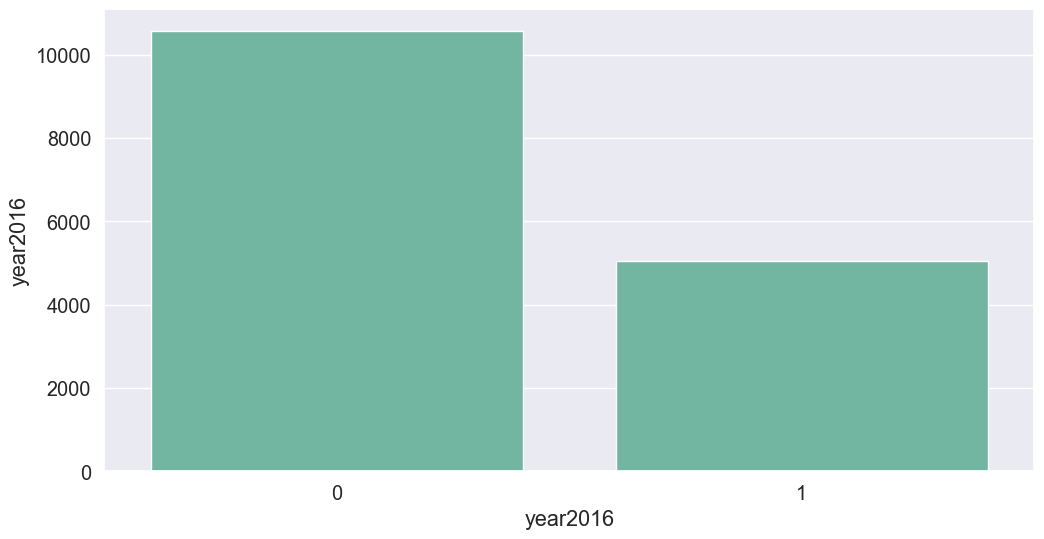

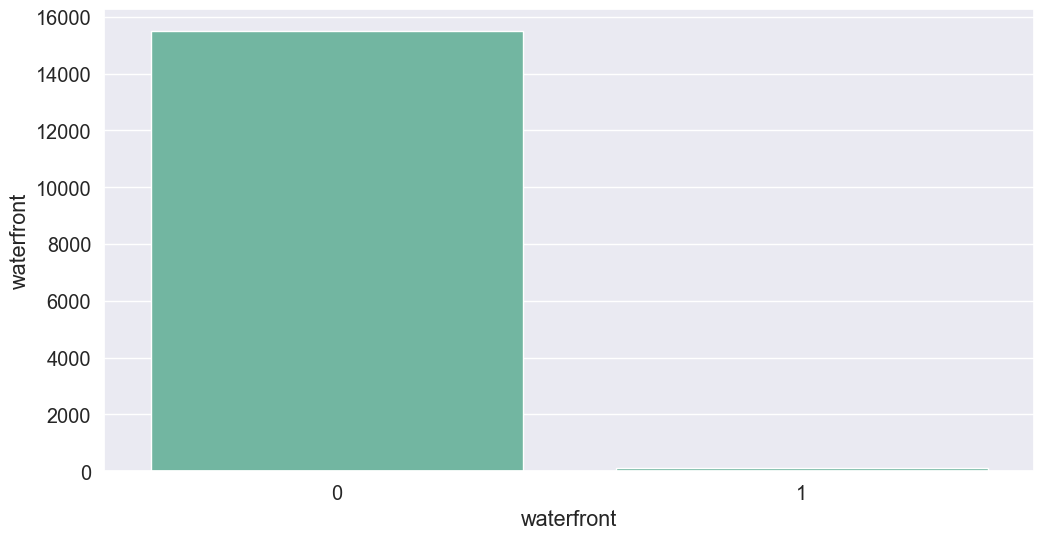

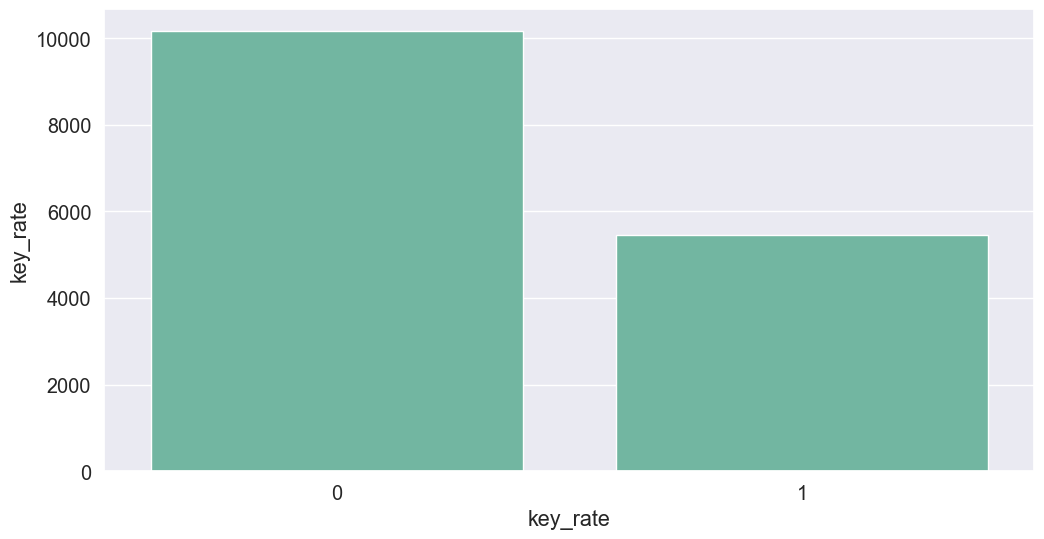

In [12]:
# распределение бинарных
for f in bin_features:
    plt.figure(figsize=(12,6))
    sns.barplot(df.groupby(f)[f].count())
    plt.show()

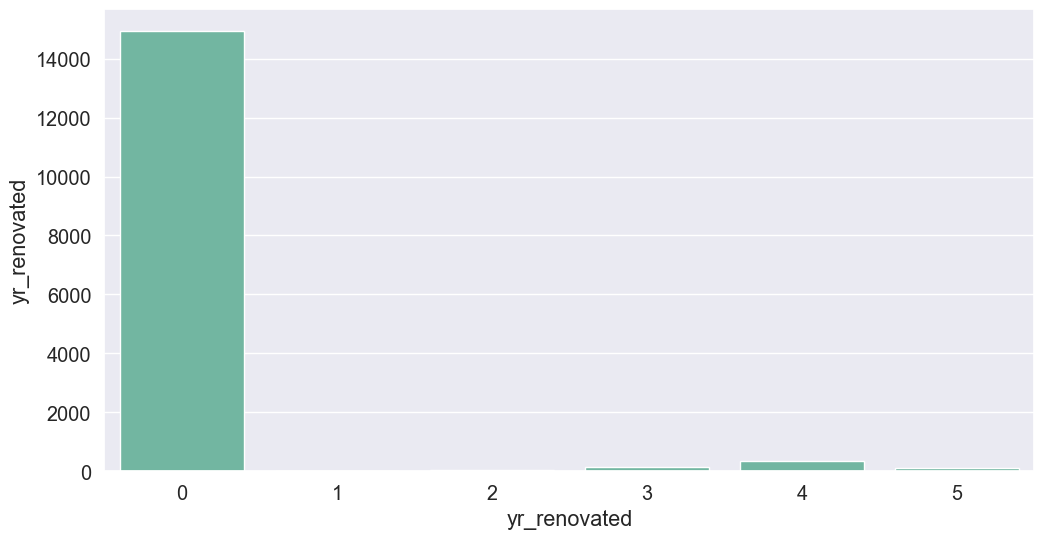

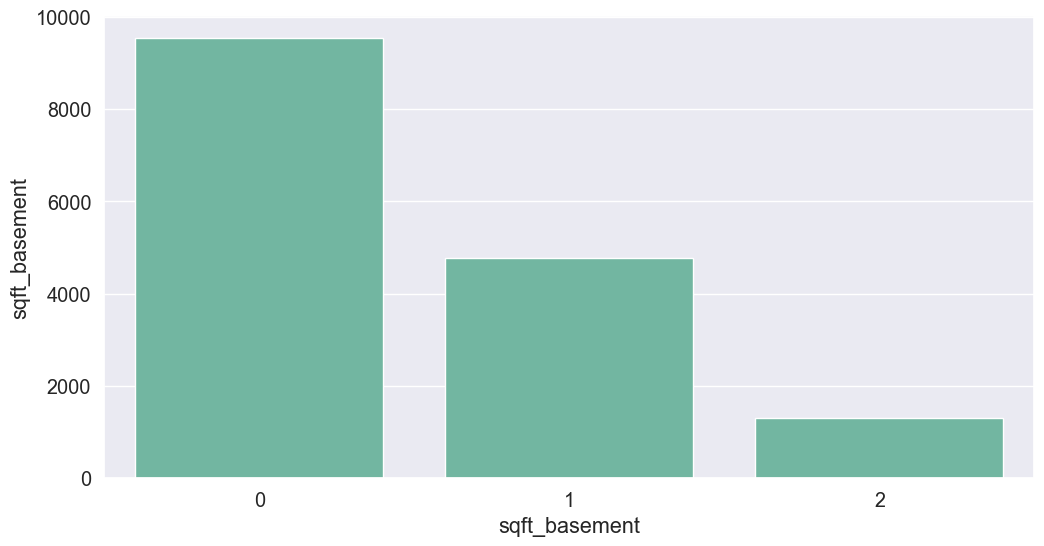

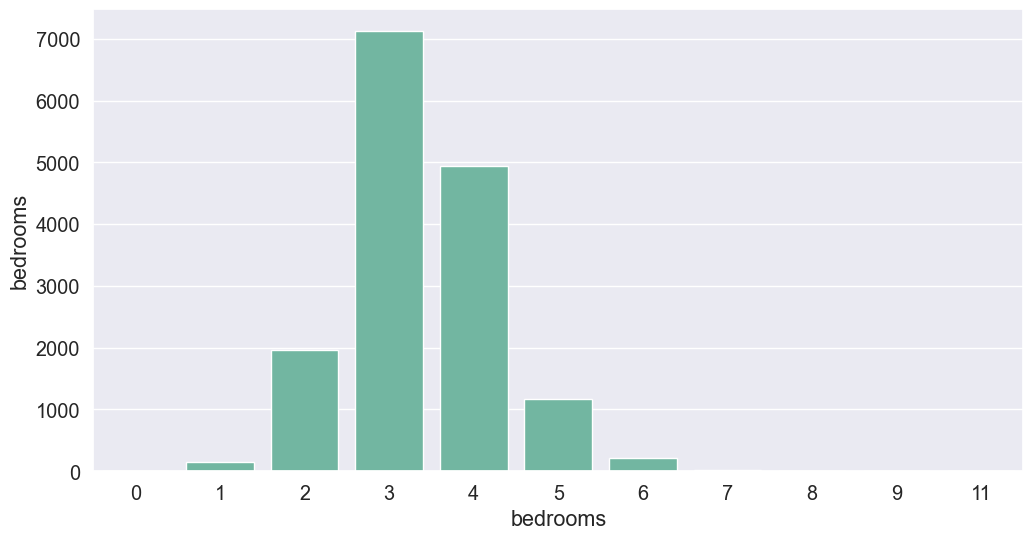

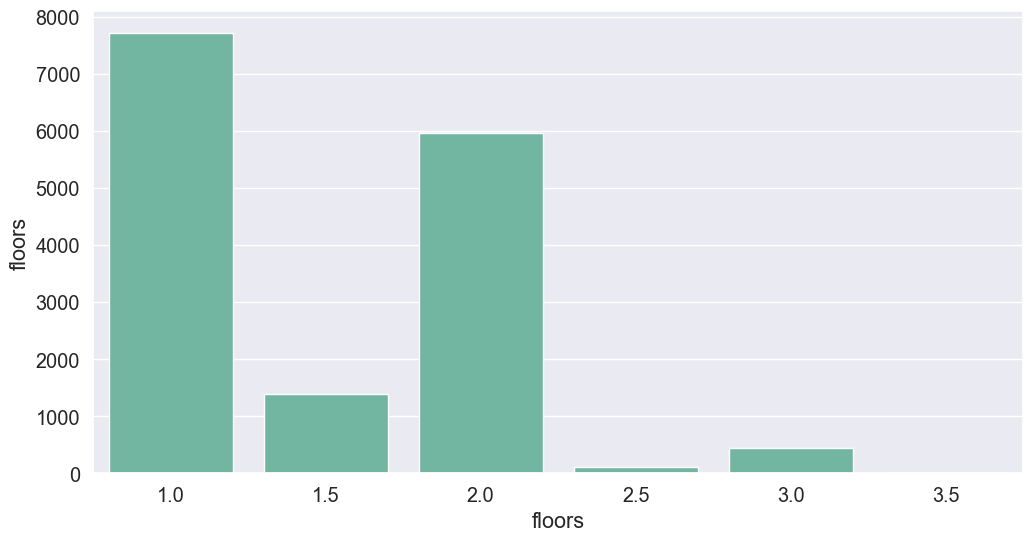

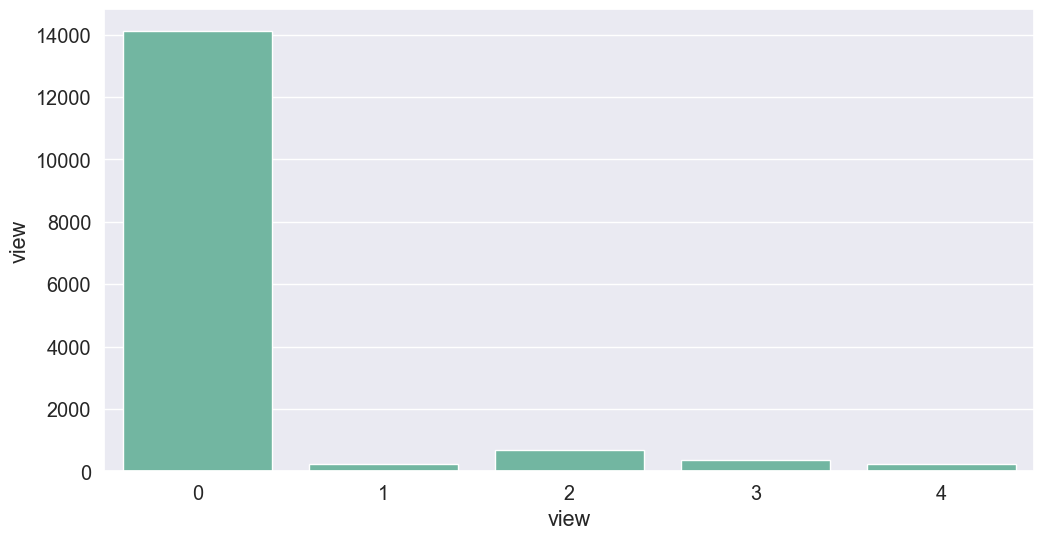

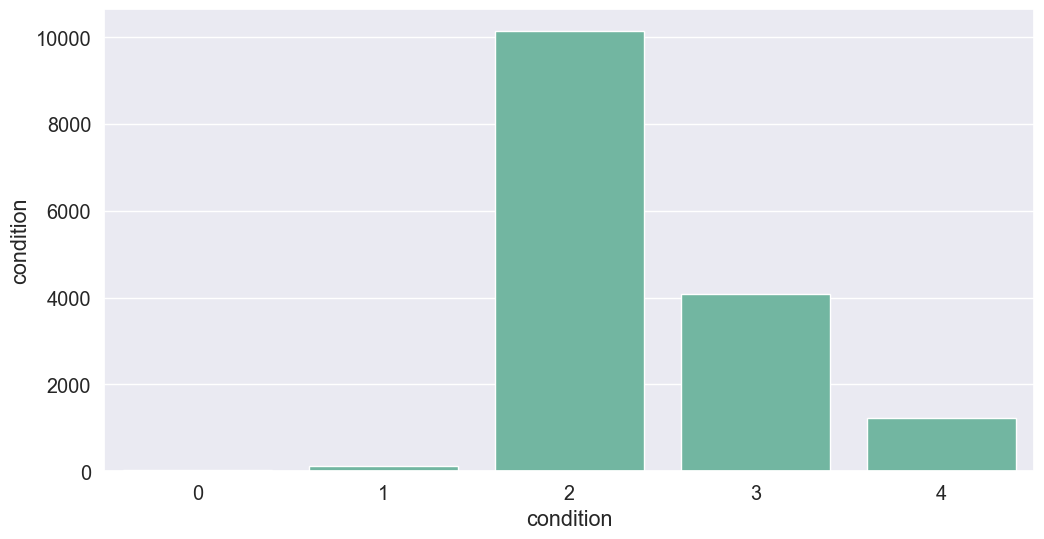

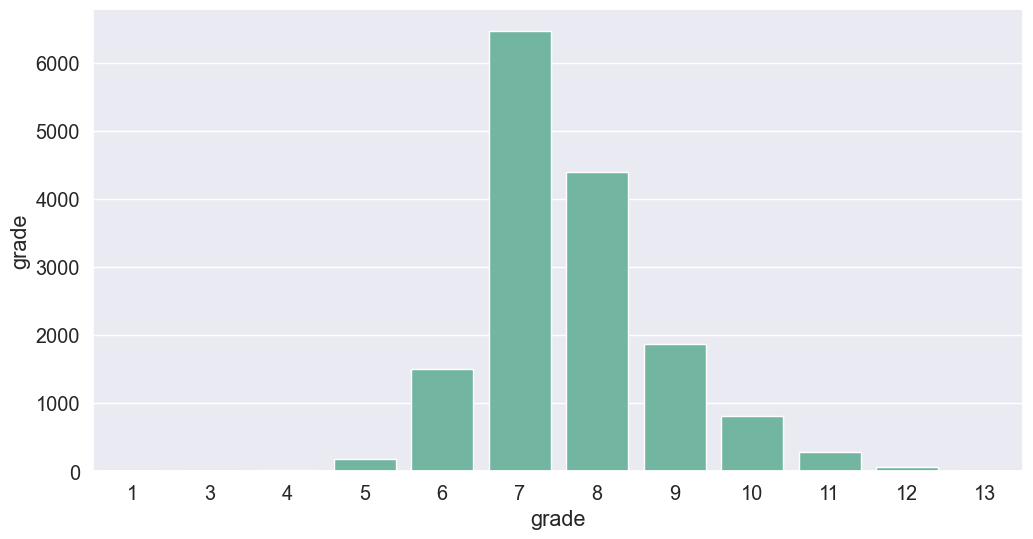

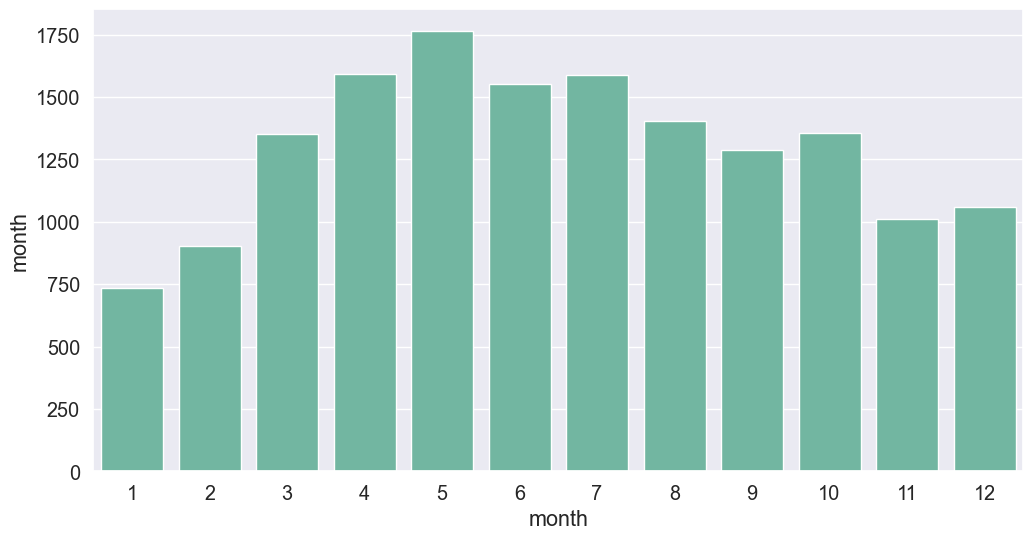

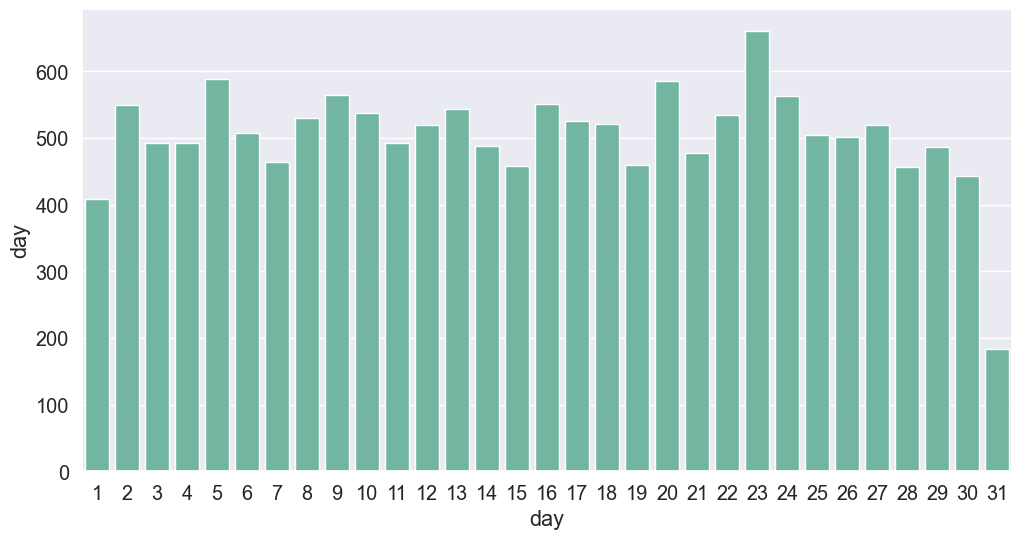

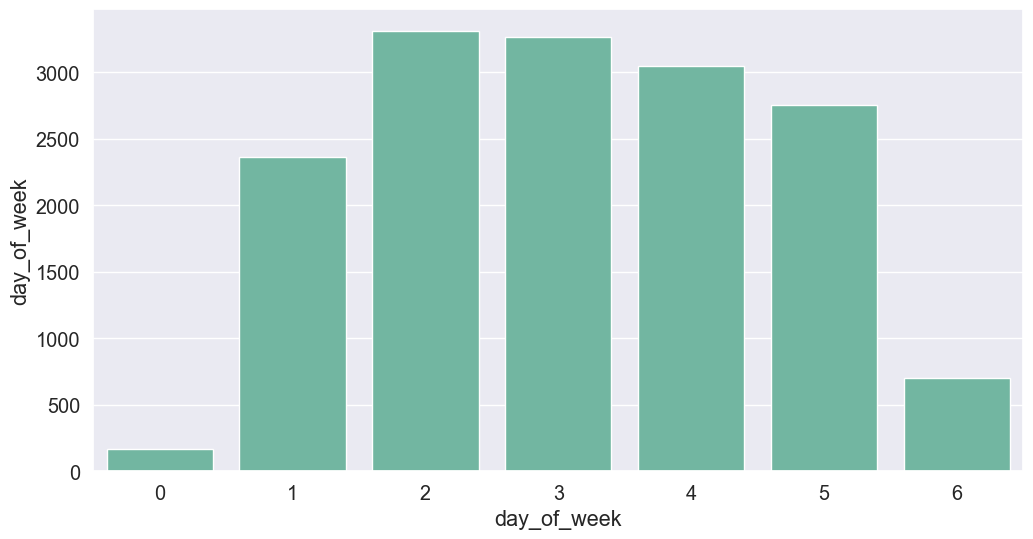

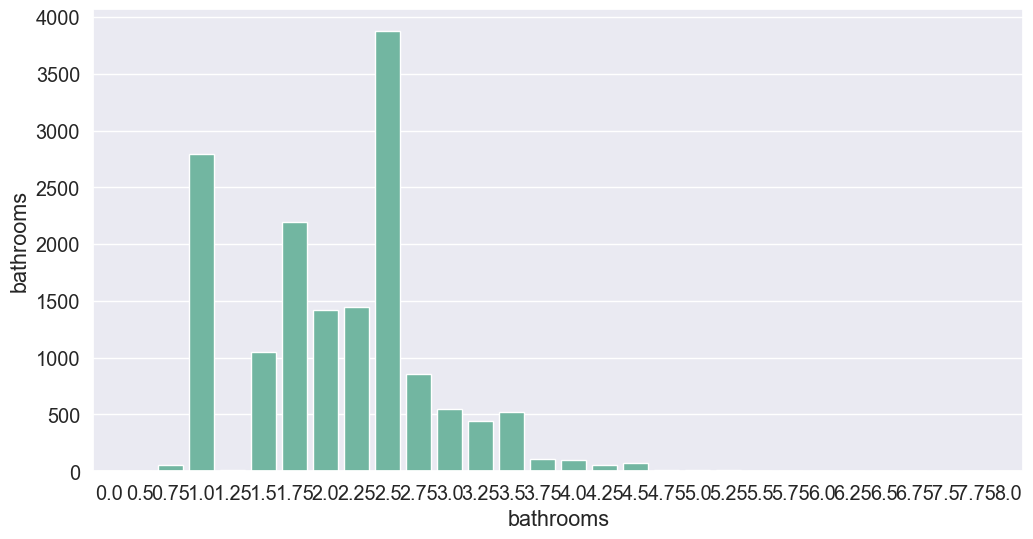

In [13]:
# распределение категориальных
for f in cat_features:
    plt.figure(figsize=(12,6))
    sns.barplot(df.groupby(f)[f].count())
    plt.show()

In [14]:
# сгруппируем и почистим некоторые категориальные признаки

print(len(df), end=' -> ')
df = df[df.bedrooms > 0]  # 0 - выброс. Всего 9 записей - проще удалить. V4 !!!!!!
print(len(df))
df.bedrooms = df.bedrooms.apply(lambda x: 1 if x==0 else(x if x < 5 else 5))  # сгруппируем редкие большие значения

print(len(df), end=' -> ')
df = df[df.floors < 3.4]  # 3.5 - выброс. Всего 6 записей - проще удалить. V4 !!!!!!
print(len(df))
df.floors = df.floors.round().apply(lambda x: min(x,2)).astype(int) - 1  # сгруппируем редкие большие значения (получилось, что бинаризовали)

df.view = df.view.apply(lambda x: 0 if x in [0,1] else (2 if x in [3,4] else 1))  # сгруппируем близкие значения
df.condition = df.condition.apply(lambda x: 0 if x in [0,1] else (2 if x in [3,4] else 1))  # сгруппируем близкие значения

def func(x):
    if x in [1,2,3]:
        return 0
    elif x in [4,5,6]:
        return 1
    elif x in [7]:
        return 2
    elif x in [8,9,10]:
        return 3
    elif x in [11,12,13]:
        return 4
df.grade = df.grade.apply(func)  # сгруппируем близкие значения

15610 -> 15601
15601 -> 15595


In [15]:
display(df['bathrooms'].round().value_counts().sort_index())  # в общем, выглядит подозрительно. Округлим и удалим выбросы
df['bathrooms'] = df['bathrooms'].round().astype(int)
print(len(df), end=' -> ')
df = df[(df['bathrooms'] > 0) & (df['bathrooms'] < 5)]
print(len(df))

bathrooms
0.0       5
1.0    2852
2.0    9985
3.0    1845
4.0     854
5.0      33
6.0      15
7.0       2
8.0       4
Name: count, dtype: int64

15595 -> 15536


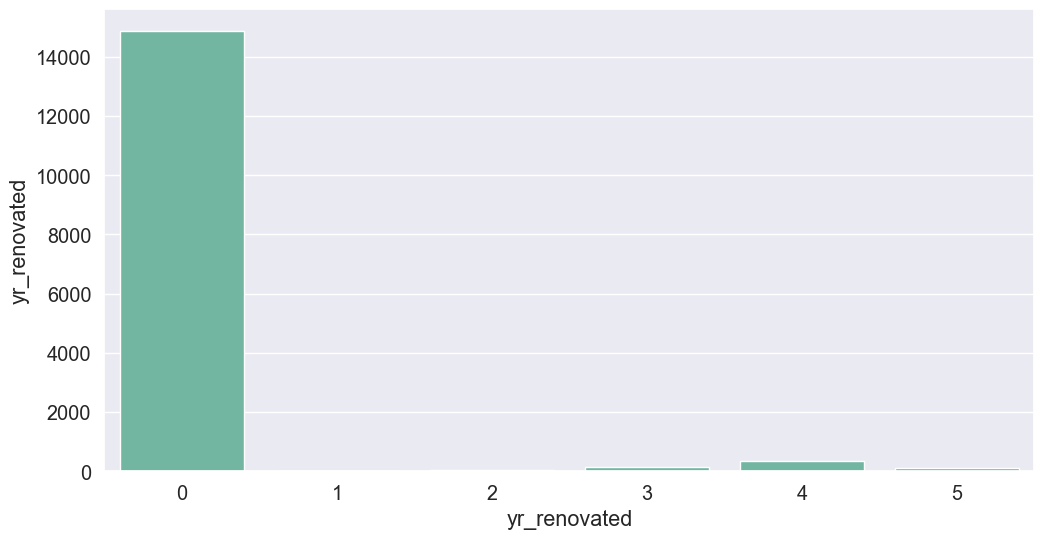

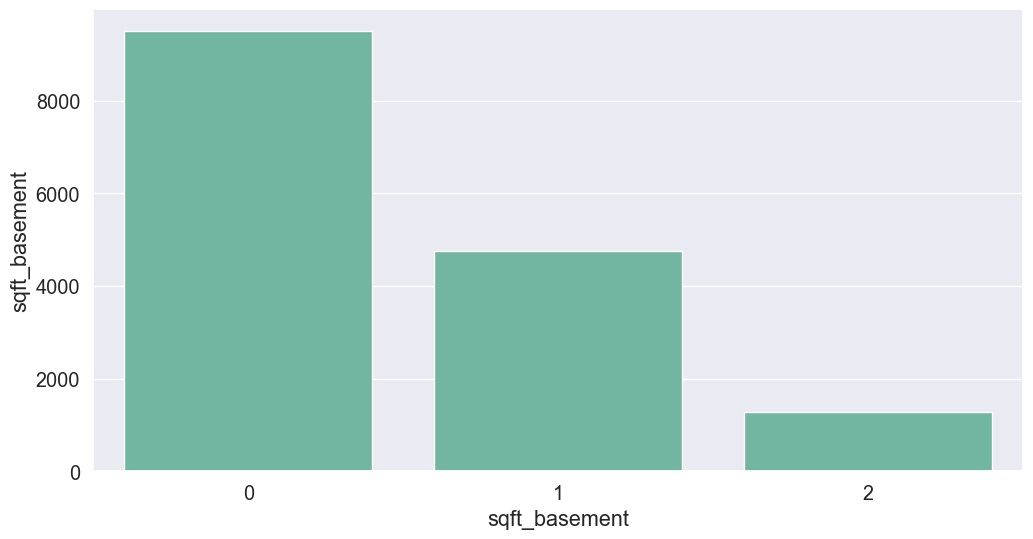

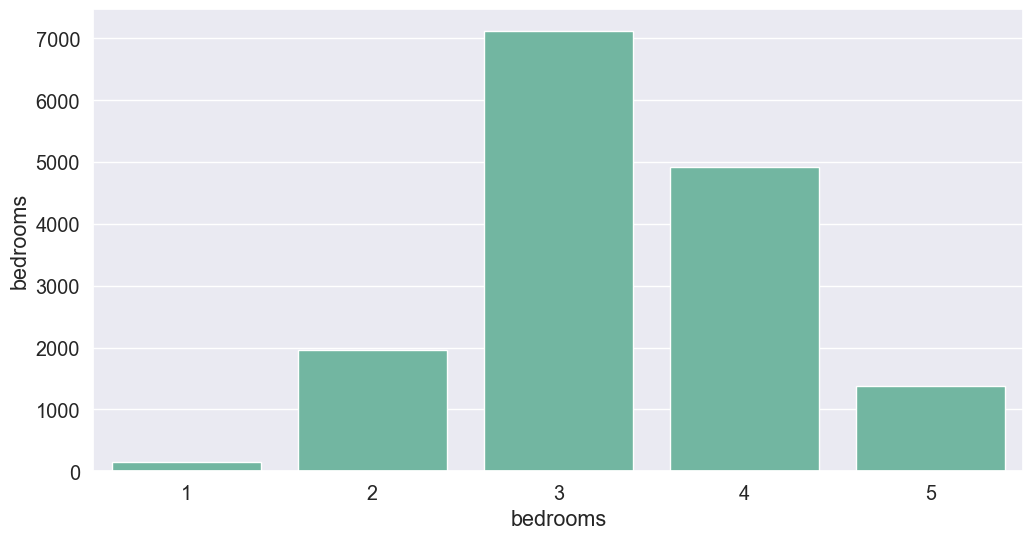

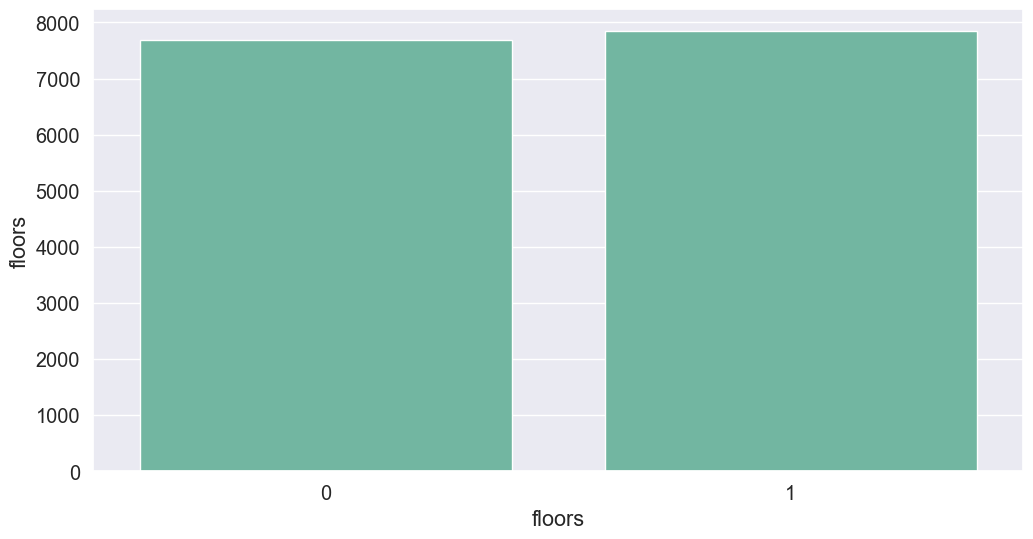

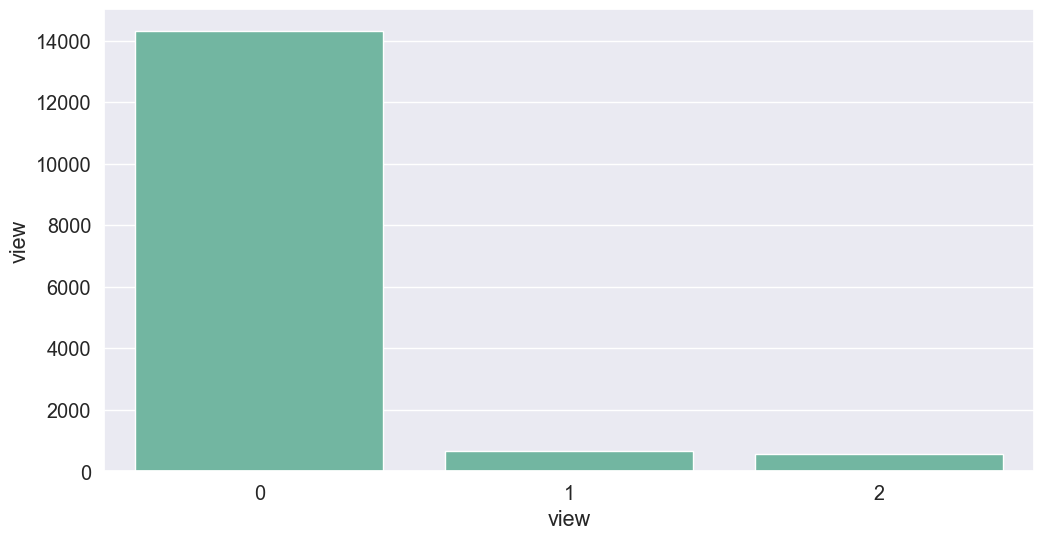

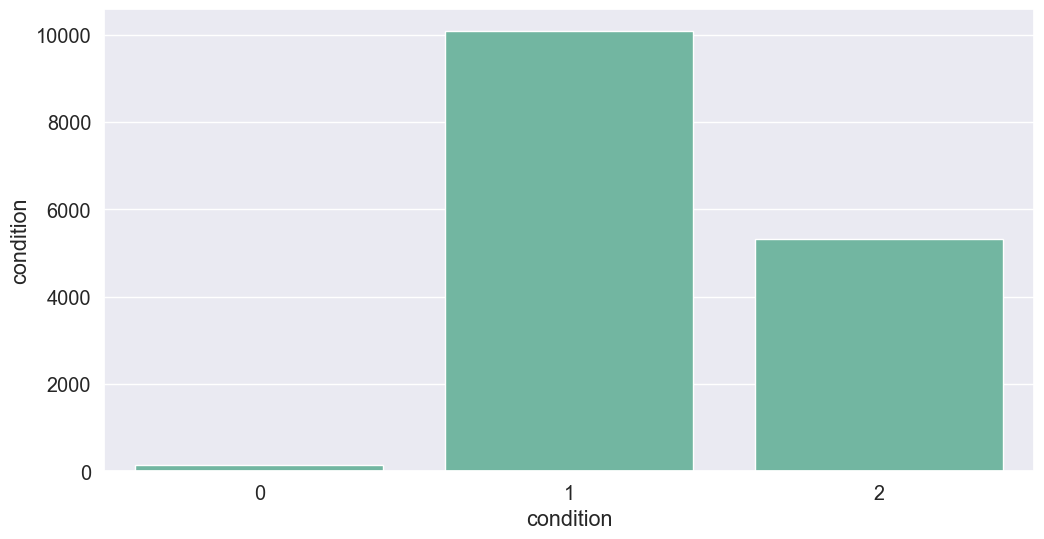

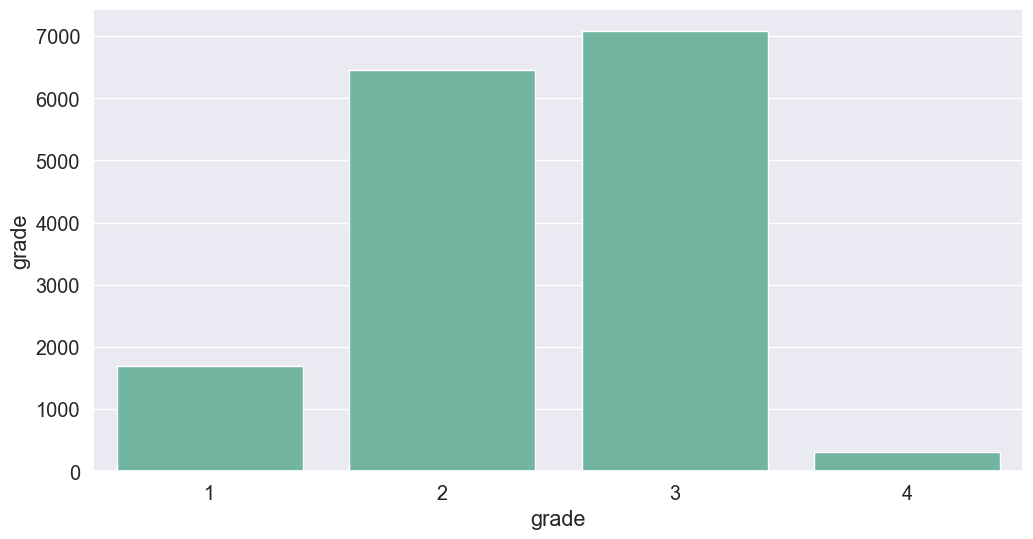

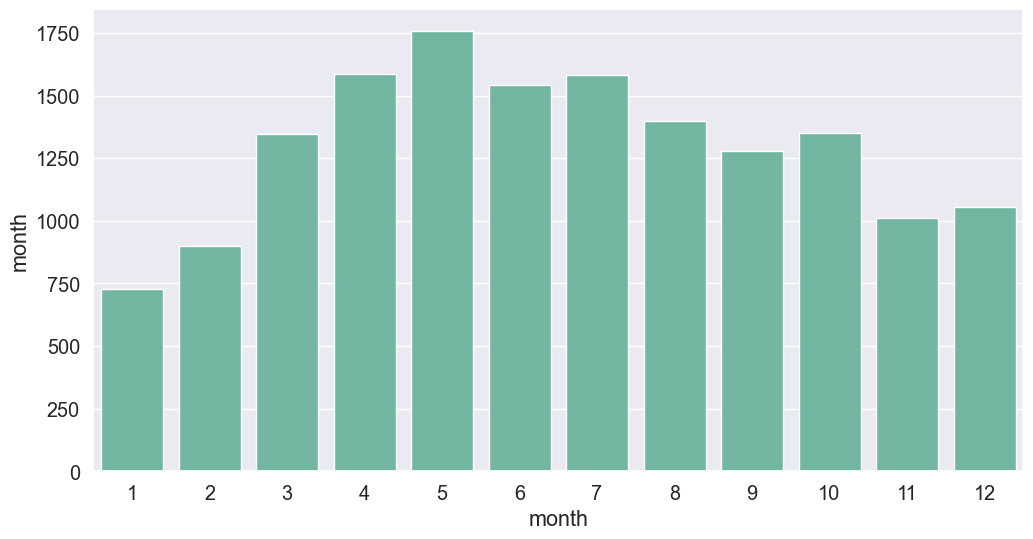

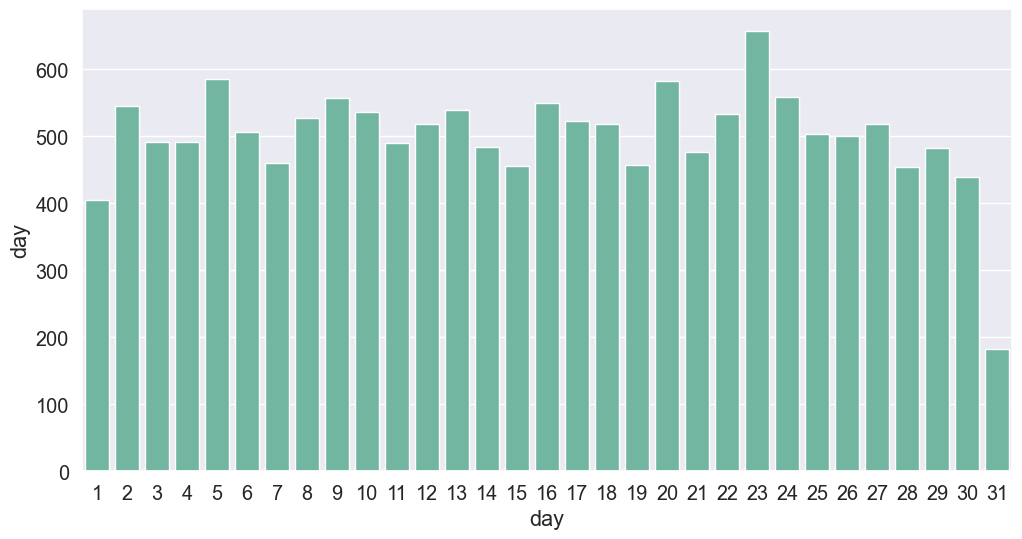

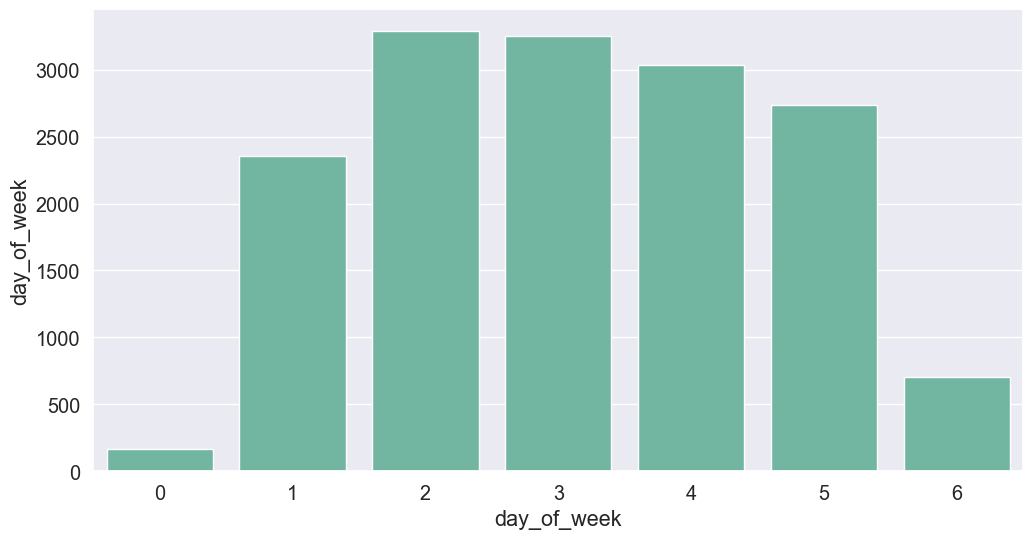

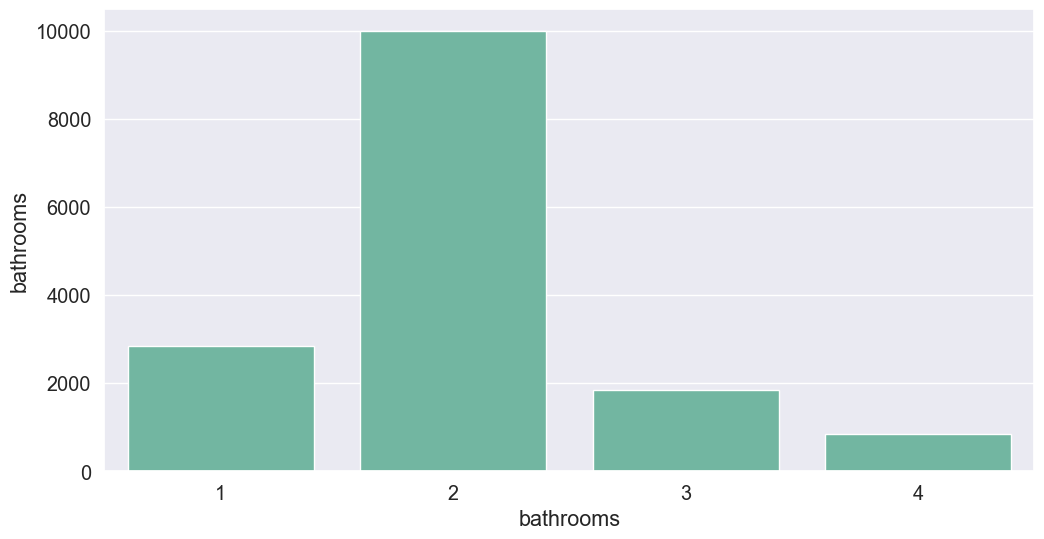

In [16]:
# новое распределение категориальных
for f in cat_features:
    plt.figure(figsize=(12,6))
    sns.barplot(df.groupby(f)[f].count())
    plt.show()

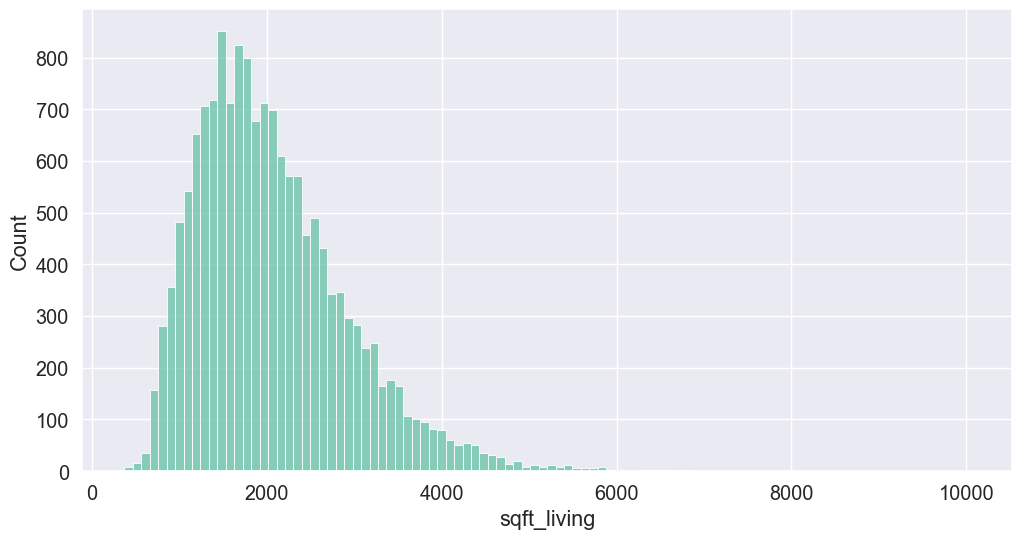

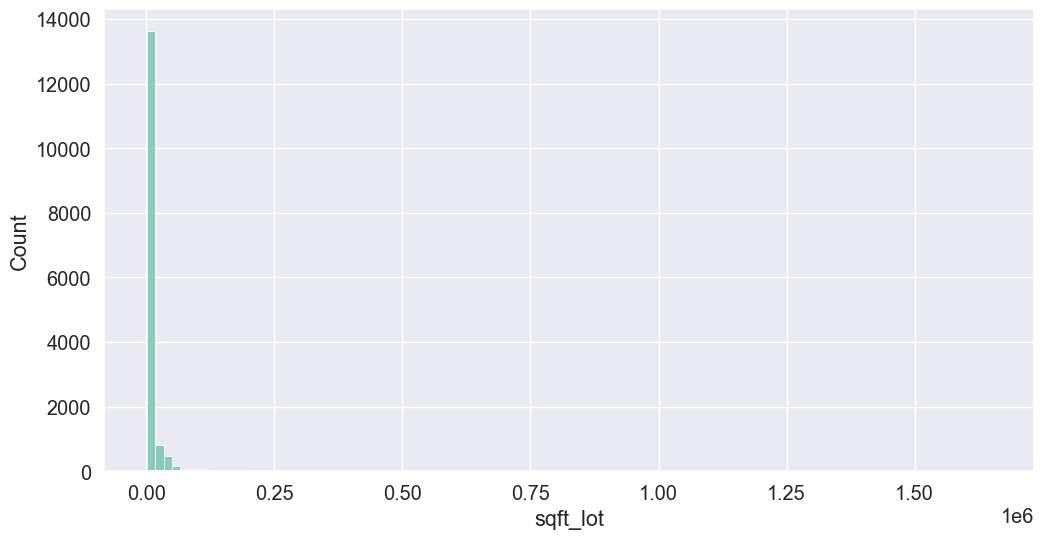

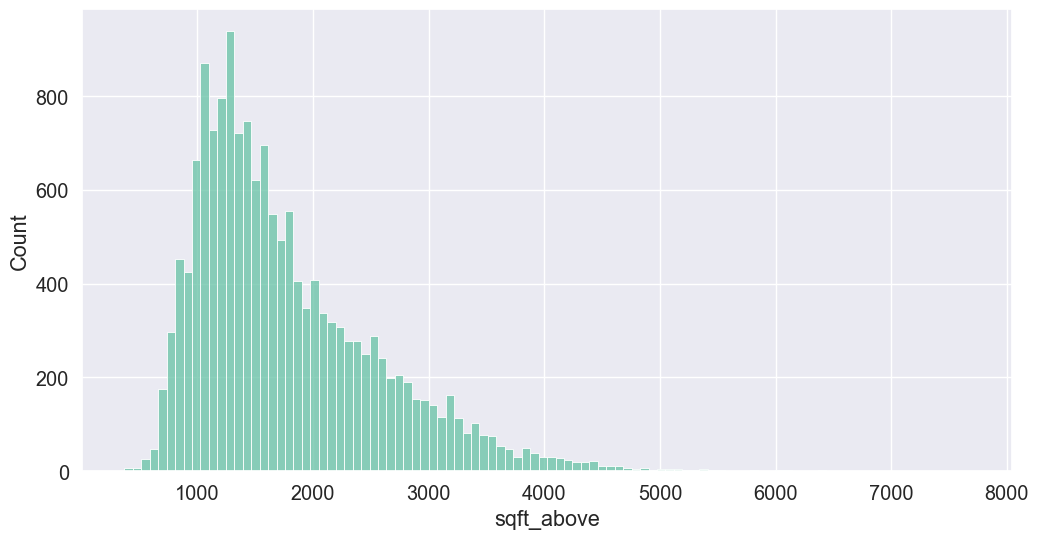

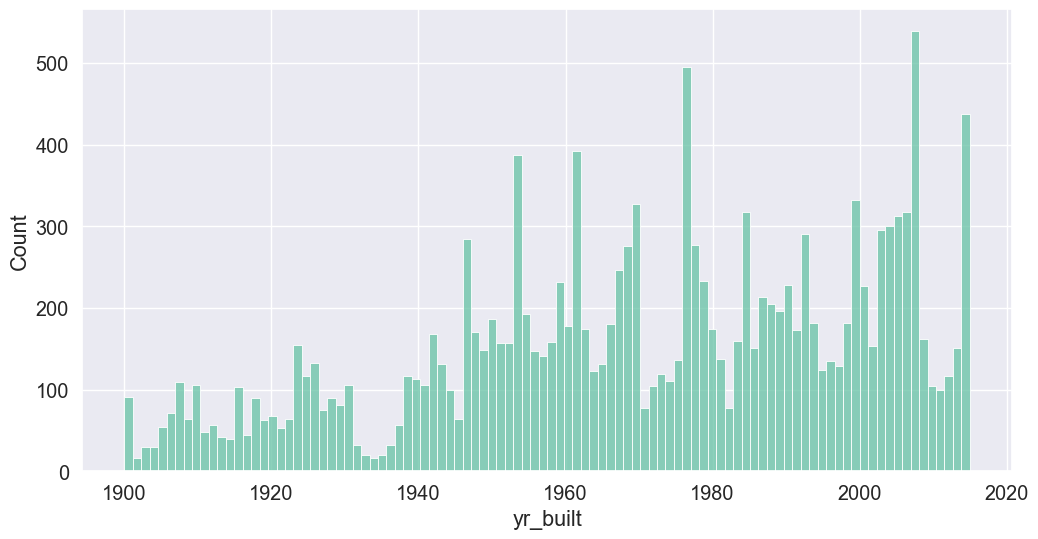

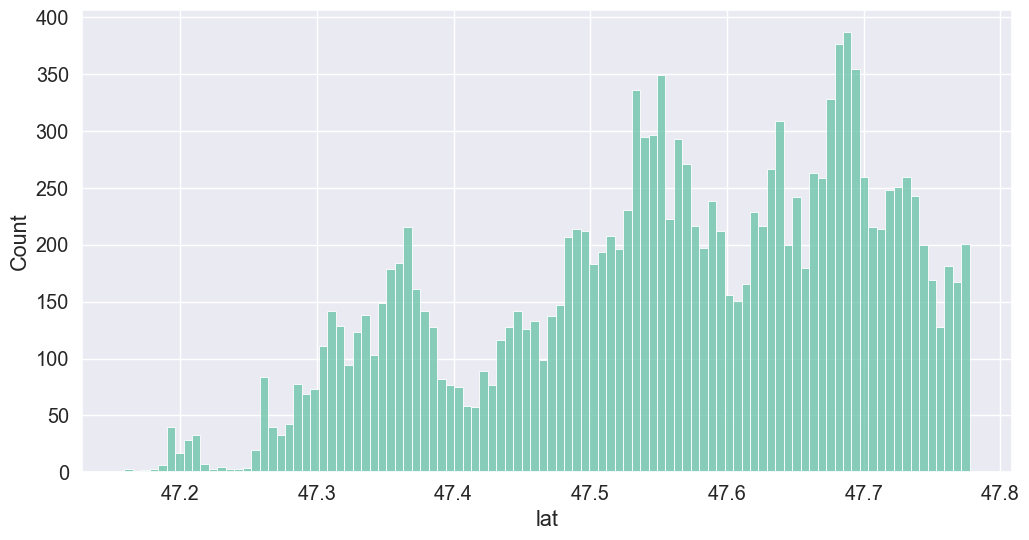

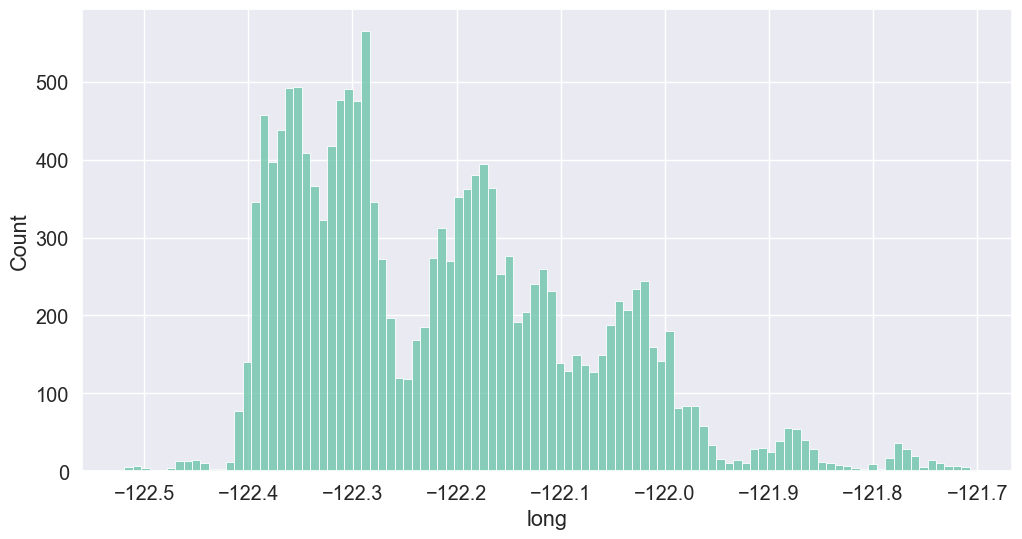

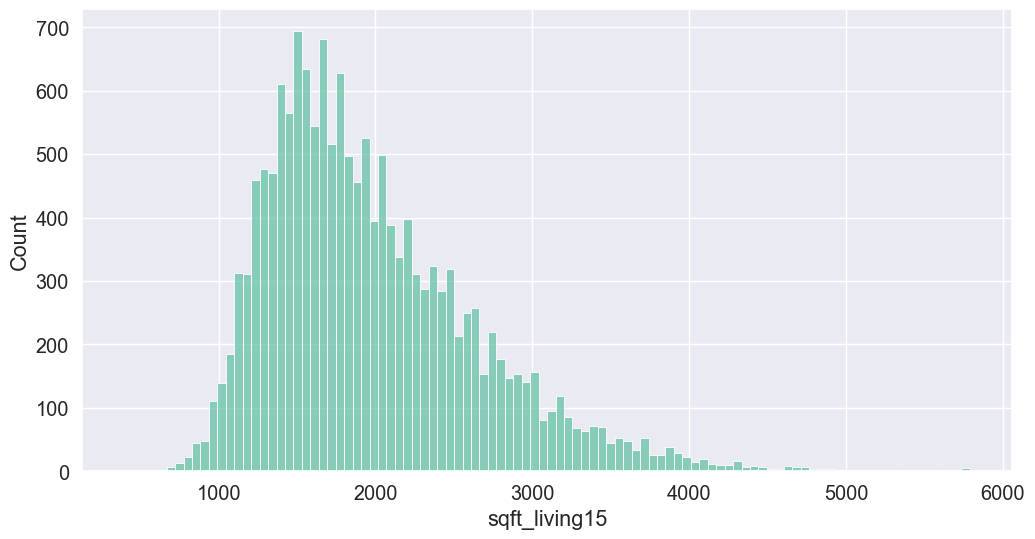

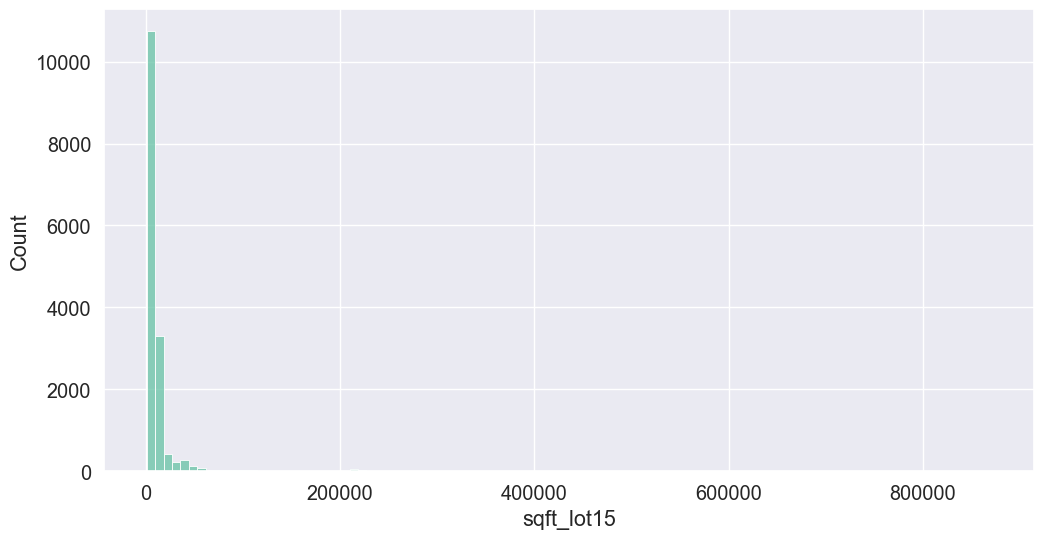

In [17]:
# распределение числовых
for f in num_features:
    plt.figure(figsize=(12,6))
    sns.histplot(df[f], bins=100)
    plt.show()

15536 -> 15318


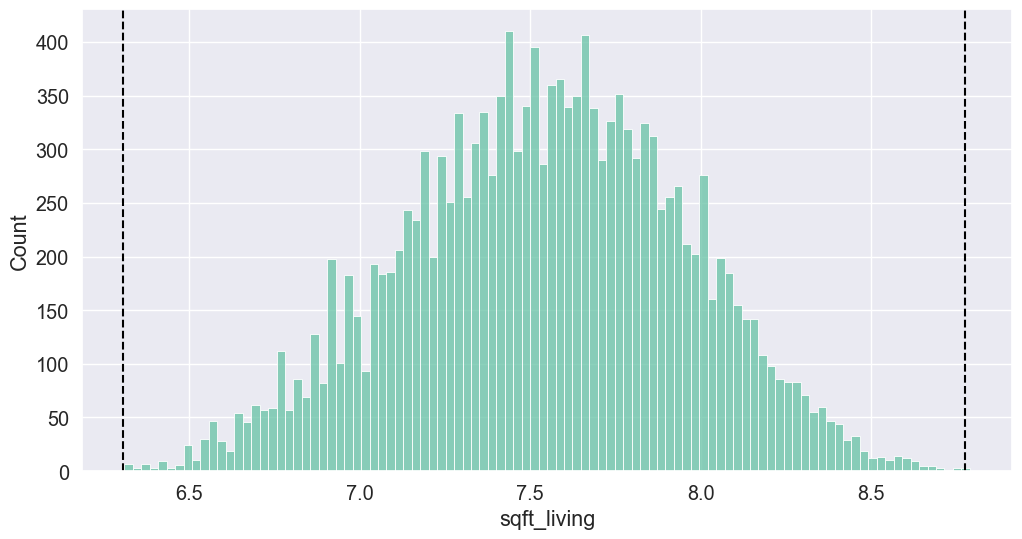

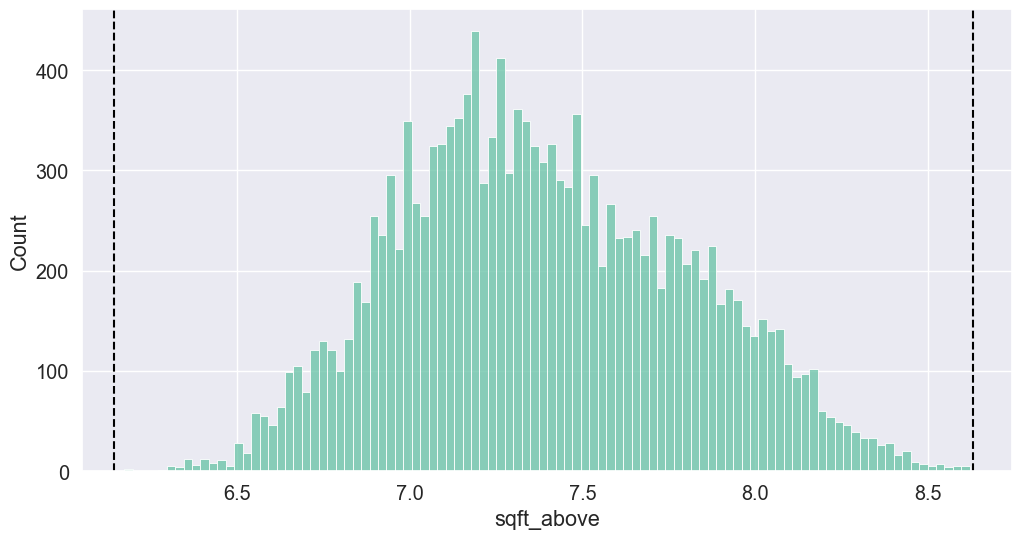

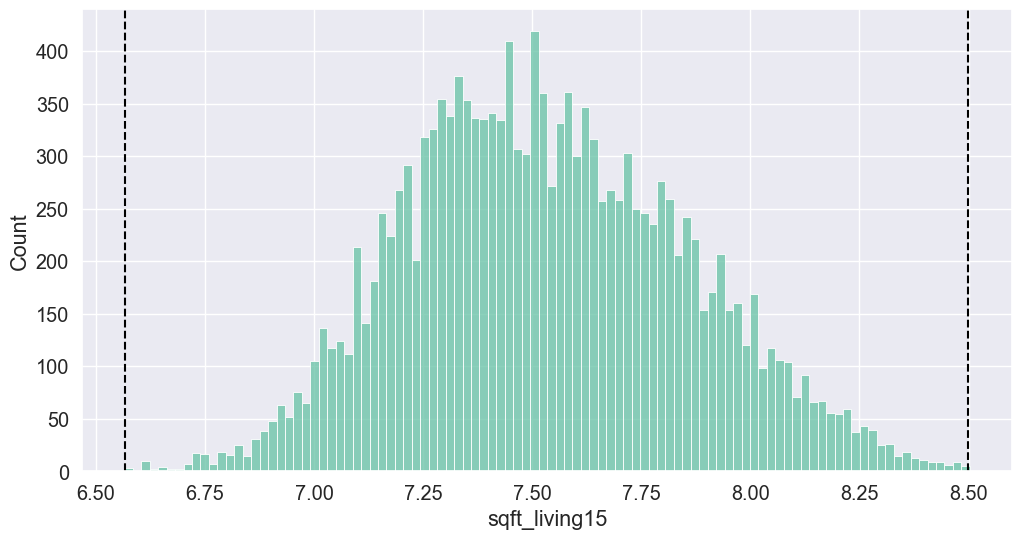

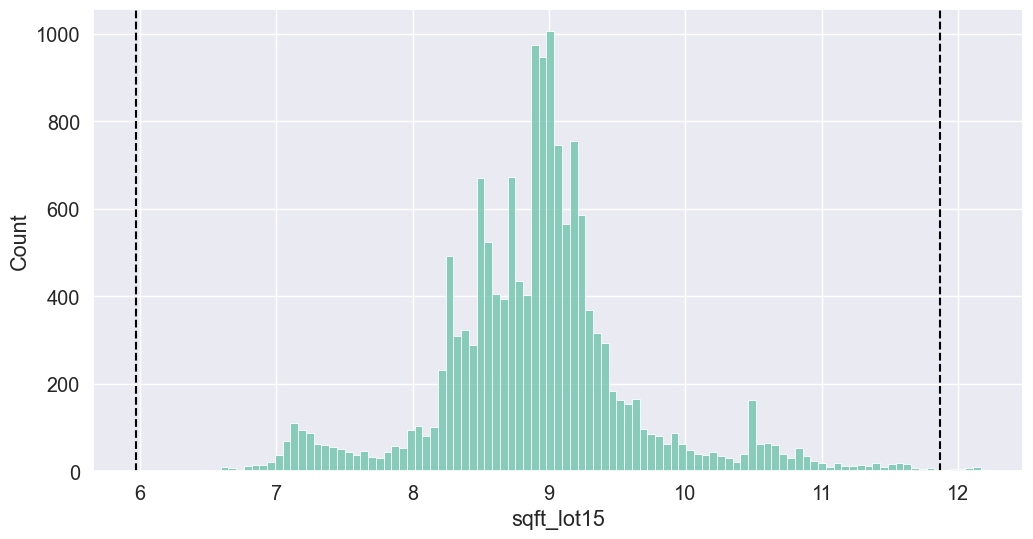

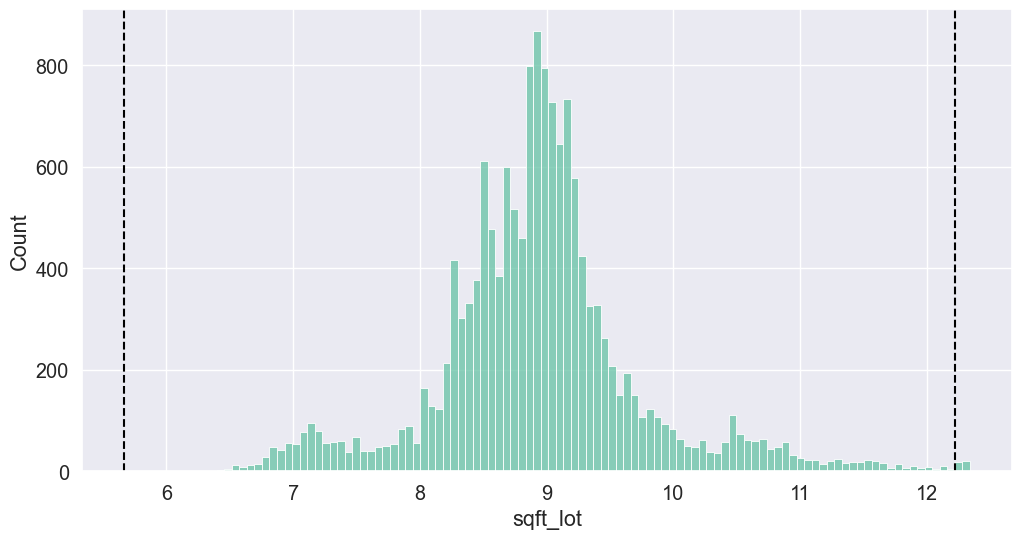

In [18]:
# у некоторых признаков распределение похоже на логнормальное, проверим (действвительно). Отсеем выбросы (за num=3 сигма)
num = 3
print(len(df), end=' -> ')
for f in ['sqft_living','sqft_above','sqft_living15']:
    df[f] = np.log(df[f])
    L,R = df[f].mean() - num*df[f].std(), df[f].mean() + num*df[f].std()
    df = df[(df[f]>=L) & (df[f]<=R)]
num = 4
for f in ['sqft_lot15','sqft_lot']:
    df[f] = np.log(df[f])
    L,R = df[f].mean() - num*df[f].std(), df[f].mean() + num*df[f].std()
    df = df[(df[f]>=L) & (df[f]<=R)]
print(len(df))

num = 3
for f in ['sqft_living','sqft_above','sqft_living15']:
    plt.figure(figsize=(12,6))
    sns.histplot(df[f], bins=100)
    L,R = df[f].mean() - num*df[f].std(), df[f].mean() + num*df[f].std()
    plt.axvline(L, ls='--', color='black')
    plt.axvline(R, ls='--', color='black')
    plt.show()
num = 4
for f in ['sqft_lot15','sqft_lot']:
    plt.figure(figsize=(12,6))
    sns.histplot(df[f], bins=100)
    L,R = df[f].mean() - num*df[f].std(), df[f].mean() + num*df[f].std()
    plt.axvline(L, ls='--', color='black')
    plt.axvline(R, ls='--', color='black')
    plt.show()

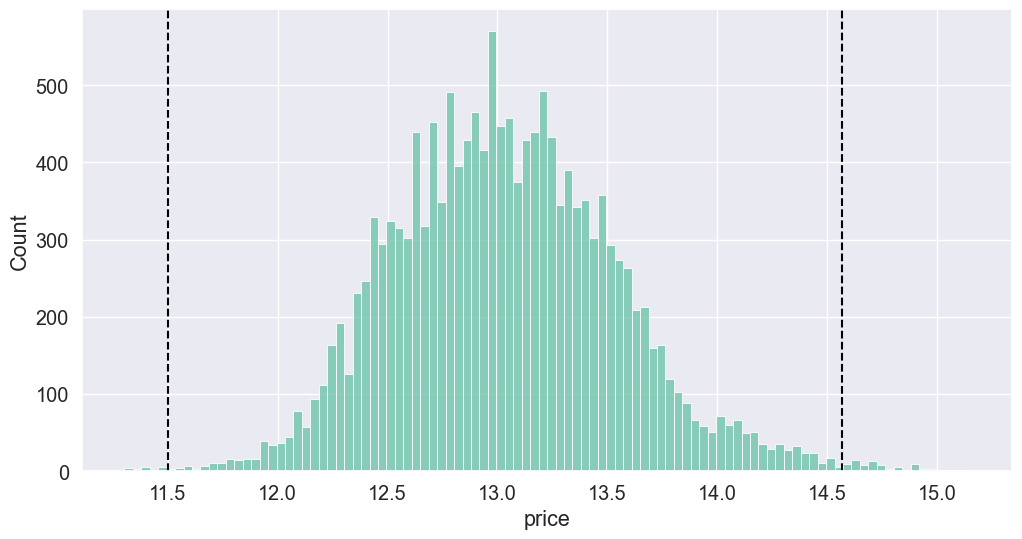

15318 -> 15214


In [20]:
# распределение таргета - тоже логнормальное (не забудем в конце применить экспоненту)
df[target] = np.log(df[target])
plt.figure(figsize=(12,6))
sns.histplot(df[target], bins=100)
num = 3
L,R = df[target].mean() - num*df[target].std(), df[target].mean() + num*df[target].std()
plt.axvline(L, ls='--', color='black')
plt.axvline(R, ls='--', color='black')
plt.show()

print(len(df), end=' -> ')  # удалим выбросы
df = df[(df[target]>=L) & (df[target]<=R)]
print(len(df))

In [24]:
# распределение по координатам
fig = px.scatter_mapbox(df, lat="lat", lon="long",  color="price", size_max=15, zoom=9)  #.show()
fig.write_html("log_price.html")  # прикрепил отдельным файлом
# px.scatter_mapbox(df, lat="lat", lon="long",  color="cluster", size_max=15, zoom=9).show()  # интересная идея, но прироста не было
# наблюдения:
#  выбросов мало (все точки в автомобильной доступности от Сиэтла), но 16 точек восточнее -121.7, в целом, можно выкинуть (сделал в начале)
#  видны кластеры (в силу высокой зональности городов США и особенностей географии Сиэтла). Кластеризуем и со следующей итерации создам новый признак
#  можно поискать ближайшие магазины \ рестораны \ спортзалы \ школы \ больницы \ остановки транспорта \ криминальные районы

#### Обучение (подбор параметров)
Работает крайне долго, так что перезапустить не успею. При выполнении задачи параметры подобрал тут

In [235]:
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train[num_features] = scaler.fit_transform(X_train[num_features])
# X_test[num_features] = scaler.transform(X_test[num_features])

In [236]:
# search = RandomizedSearchCV(
#     estimator=XGBRegressor(random_state=42),  #eval_metric='mape', 
#     n_iter=50,
#     param_distributions={
#         'n_estimators' : np.arange(10,2000),
#         'max_depth' : np.arange(1,20),
#     },
#     scoring=make_scorer(MAPE, greater_is_better=False),
#     n_jobs=1,
#     cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
#     error_score='raise',
#     random_state=42
# ).fit(X_train, y_train)

# print("Лучшие гиперпараметры:")
# for k,v in search.best_params_.items():
#     print(f'{k}: {v:.4f}')

# best_xgb = search.best_estimator_
# best_xgb.fit(X_train, y_train)
# y_pred_best_xgb = best_xgb.predict(X_test)
# MAPE(np.exp(y_test), np.exp(y_pred_best_xgb))

Лучшие гиперпараметры:
n_estimators: 767.0000
max_depth: 2.0000


0.009190749480652015

In [237]:
# search = RandomizedSearchCV(
#     estimator=LGBMRegressor(random_state=42, verbose=-1),  #eval_metric='mape',
#     n_iter=100,
#     param_distributions={
#         'n_estimators' : np.arange(10,2000),
#         'max_depth' : np.arange(1,20),
#     },
#     scoring=make_scorer(MAPE, greater_is_better=False),
#     n_jobs=1,
#     cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
#     error_score='raise',
#     random_state=42
# ).fit(X_train, y_train)

# print("Лучшие гиперпараметры:")
# for k,v in search.best_params_.items():
#     print(f'{k}: {v:.4f}')

# best_gbm = search.best_estimator_
# best_gbm.fit(X_train, y_train)
# y_pred_best_gbm = best_gbm.predict(X_test)
# MAPE(np.exp(y_test), np.exp(y_pred_best_gbm))

Лучшие гиперпараметры:
n_estimators: 436.0000
max_depth: 4.0000


0.00884223437098071

In [238]:
# search = RandomizedSearchCV(
#     estimator=CatBoostRegressor(random_state=42, verbose=0),  #eval_metric='mape', 
#     n_iter=16,
#     param_distributions={
#         'n_estimators' : np.arange(10,500),
#         'max_depth' : np.arange(1,16),
#     },
#     scoring=make_scorer(MAPE, greater_is_better=False),
#     n_jobs=1,
#     cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
#     error_score='raise',
#     random_state=42
# ).fit(X_train, y_train)

# print("Лучшие гиперпараметры:")
# for k,v in search.best_params_.items():
#     print(f'{k}: {v:.4f}')

# best_cb = search.best_estimator_
# best_cb.fit(X_train, y_train)
# y_pred_best_cb = best_cb.predict(X_test)
# MAPE(np.exp(y_test), np.exp(y_pred_best_cb))

KeyboardInterrupt: 

In [239]:
# search = RandomizedSearchCV(
#     estimator=GradientBoostingRegressor(random_state=42),
#     n_iter=20,
#     param_distributions={
#         'n_estimators' : np.arange(10,500),
#         'max_depth' : np.arange(1,20),
#     },
#     scoring=make_scorer(MAPE, greater_is_better=False),
#     n_jobs=1,
#     cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
#     error_score='raise',
#     random_state=42
# ).fit(X_train, y_train)

# print("Лучшие гиперпараметры:")
# for k,v in search.best_params_.items():
#     print(f'{k}: {v:.4f}')

# best_gb = search.best_estimator_
# best_gb.fit(X_train, y_train)
# y_pred_best_gb = best_gb.predict(X_test)
# MAPE(np.exp(y_test), np.exp(y_pred_best_gb))

Лучшие гиперпараметры:
n_estimators: 455.0000
max_depth: 7.0000


0.12706789746625094

#### Сабмит

In [21]:
def preprocess(X, for_train=False):
    """Предобработка данных для сабмита"""
    for f in ['id','zipcode']:  # дроп ненужных признаков
        if f in X.columns:
            X.drop([f], axis=1, inplace=True)
    X['condition'] -= 1

    X['date'] = pd.to_datetime(X['date'], errors='coerce')  # признаки из даты
    X['year'], X['month'], X['day'], X['day_of_week'] = X['date'].dt.year, X['date'].dt.month, X['date'].dt.day, X['date'].dt.day_of_week
    X['key_rate'] = X['date'].apply(lambda x: int(x >= pd.Timestamp(2015,12,17)))  # ключ. ставка (внеш. источник)
    X.drop(['date'], inplace=True, axis=1)

    # группирока значений некоторых категориальных и дискретизация некоторых числовых
    X.sqft_basement = X.sqft_basement.apply(lambda x: 0 if x==0 else min(2, np.ceil(x/1000))).astype(int)
    X.bathrooms = X.bathrooms.round().astype(int)
    if for_train:
        X = X[X.long <= -121.7]
        X = X[X.bedrooms > 0]  # 0 - выброс. Всего 9 записей - проще удалить (добавил в V4)
        X = X[X.floors < 3.4]  # 3.5 - выброс. Всего 6 записей - проще удалить (добавил в V4)
        X = X[(X.bathrooms > 0) & (X.bathrooms < 5)]
    X.bedrooms = X.bedrooms.apply(lambda x: 1 if x==0 else(x if x < 5 else 5))
    X.floors = X.floors.round().apply(lambda x: min(x,2)).astype(int) - 1
    X.view = X.view.apply(lambda x: 0 if x in [0,1] else (2 if x in [3,4] else 1))
    X.condition = X.condition.apply(lambda x: 0 if x in [0,1] else (2 if x in [3,4] else 1))
    def func(x):
        if x in [1,2,3]:
            return 0
        elif x in [4,5,6]:
            return 1
        elif x in [7]:
            return 2
        elif x in [8,9,10]:
            return 3
        elif x in [11,12,13]:
            return 4
    X.grade = X.grade.apply(func)

    # логарифмирование и устранение выбросов у некоторых признаков и таргета
    num = 3
    for f in ['sqft_living','sqft_above','sqft_living15']:
        X[f] = np.log(X[f])
        if for_train:
            L,R = X[f].mean() - num*X[f].std(), X[f].mean() + num*X[f].std()
            X = X[(X[f]>=L) & (X[f]<=R)]
    num = 4
    for f in ['sqft_lot15','sqft_lot']:  # тут распределение меньше похоже на нормальное, проявим осторожность
        X[f] = np.log(X[f])
        if for_train:
            L,R = X[f].mean() - num*X[f].std(), X[f].mean() + num*X[f].std()
            X = X[(X[f]>=L) & (X[f]<=R)]
    num = 3
    if for_train:
        X[target] = np.log(X[target])  # не забыть восстановить размерность !!!
        L,R = X[target].mean() - num*X[target].std(), X[target].mean() + num*X[target].std()
        X = X[(X[target]>=L) & (X[target]<=R)]
    
    scaler = StandardScaler()  # масштабирование числовых
    X[num_features] = scaler.fit_transform(X[num_features])
    return X

In [22]:
Xy, X_submit = preprocess(pd.read_csv('houses_train.csv'), for_train=True), preprocess(pd.read_csv('houses_test.csv'))
X, y = Xy[[col for col in Xy.columns if col != 'price']], Xy['price']

In [23]:
models = [  # состав ансамбля
    XGBRegressor(verbose=0, n_estimators=767, max_depth=2),  # 305 4
    LGBMRegressor(verbose=-1, n_estimators=383, max_depth=13),  # 531 10
    CatBoostRegressor(verbose=0, n_estimators=352, max_depth=8),
    GradientBoostingRegressor(verbose=0, n_estimators=352, max_depth=8),  # 1 - 455 7; 2 - 483 5 ; 3 - 352 8
]
preds = []
# random_state не фиксировал, чтобы повысить шанс поднять скор. Но, к сожалению, результаты модели могут варьироваться
for model in models:
    model.fit(X, y)  # обучим на всех доступных данных
    preds.append(model.predict(X_submit))
preds = np.exp(np.array(preds)).mean(axis=0)  # предсказыаем логарифм цены, не забудем вернуть размерность

y_submit = pd.read_csv('sample_submission.csv')
y_submit['price'] = preds
y_submit.to_csv('submission.csv', index=False)